# Compare mC fractures across conditions

In [1]:
import sys
from pathlib import Path
from datetime import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads

modkit found with expected version 0.2.4


In [1]:
! ls "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/dimelo_v2_output"

CG_137_padded_reads_day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1219_numRVS2220.npy
CG_137_padded_reads_day6_CROFF_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1201_numRVS2166.npy
CG_137_padded_reads_day6_CROFF_Tcells_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1207_numRVS2190.npy
CG_137_padded_reads_day6_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD1217_numRVS2214.npy
CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD661_numRVS933.npy
CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_nu

In [12]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/dimelo_v2_output"
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/dimelo_v2_output/CG_137_removed_low80_methylated_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD493_numRVS604.npy"

# Load padded reads
CGs_all_unedited_mc0995_remove_low80 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_all_unedited_mc0995_remove_low80.shape, CGs_all_unedited_mc0995_remove_low80

Padded reads loaded successfully.


((1097, 137),
 array([[nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        [nan, nan, nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

In [13]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path+ "CG_137_removed_low70_methylated_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-03_units_combined_numFWD546_numRVS673.npy"

# Load padded reads
CGs_all_unedited_mc0995_remove_low70 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_all_unedited_mc0995_remove_low70.shape, CGs_all_unedited_mc0995_remove_low70

Padded reads loaded successfully.


((1219, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

In [3]:
! ls /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/

CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.5_NoFullyUnmethylated_T2Tv2_mCthresh0.5_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1220_numRVS2222.npy
CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1219_numRVS2220.npy
CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.95_NoFullyUnmethylated_T2Tv2_mCthresh0.95_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1215_numRVS2207.npy
CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1201_numRVS2166.npy
CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1217_numRVS2214.npy
CG_137_removed_low100_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.5_NoFullyUnmethylated_T2Tv2_mCth

In [14]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/"
save_padded_reads_name_np = "CG_137_removed_low80_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD855_numRVS1120.npy"

# Load padded reads
CGs_all_CRoff_mc0995_remove_low80 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_all_CRoff_mc0995_remove_low80.shape, CGs_all_CRoff_mc0995_remove_low80

Padded reads loaded successfully.


((1975, 137),
 array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [nan,  1., nan, ...,  1.,  1., nan],
        [ 1.,  1., nan, ..., nan, nan,  1.],
        [nan,  1., nan, ..., nan, nan, nan]]))

In [15]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/"
save_padded_reads_name_np = "CG_137_removed_low50_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1002_numRVS1459.npy"

# Load padded reads
CGs_all_CRoff_mc0995_remove_low50 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_all_CRoff_mc0995_remove_low50.shape, CGs_all_CRoff_mc0995_remove_low50

Padded reads loaded successfully.


((2461, 137),
 array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 1.,  1., nan, ..., nan, nan,  1.],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [16]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/"
save_padded_reads_name_np = "CG_137_removed_low70_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD911_numRVS1232.npy"

# Load padded reads
CGs_all_CRoff_mc0995_remove_low70 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_all_CRoff_mc0995_remove_low70.shape, CGs_all_CRoff_mc0995_remove_low70

Padded reads loaded successfully.


((2143, 137),
 array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  1., nan, ...,  1.,  1., nan],
        [ 1.,  1., nan, ..., nan, nan,  1.],
        [nan,  1., nan, ..., nan, nan, nan]]))

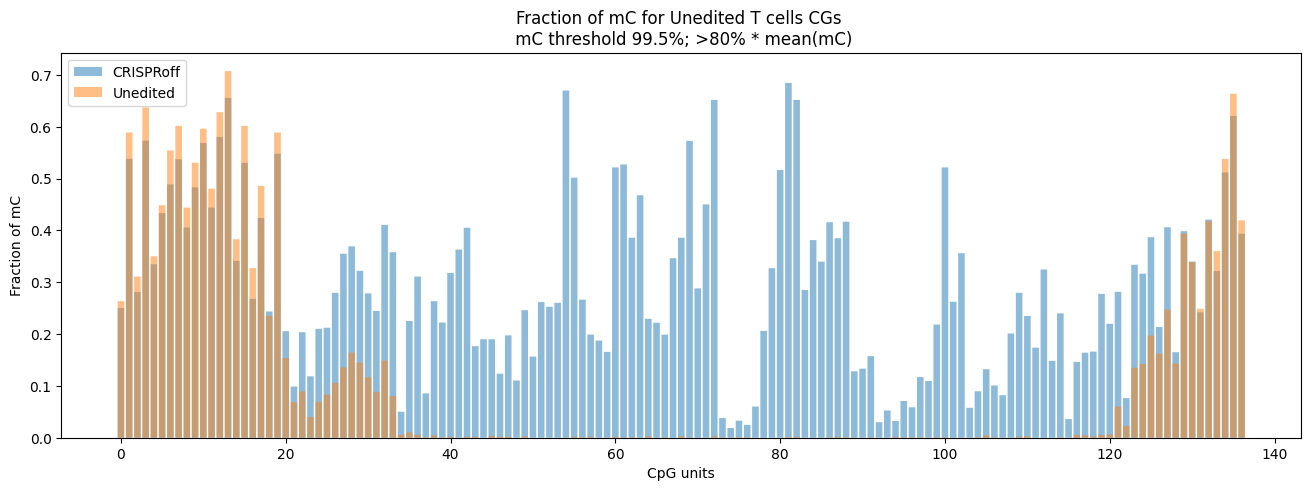

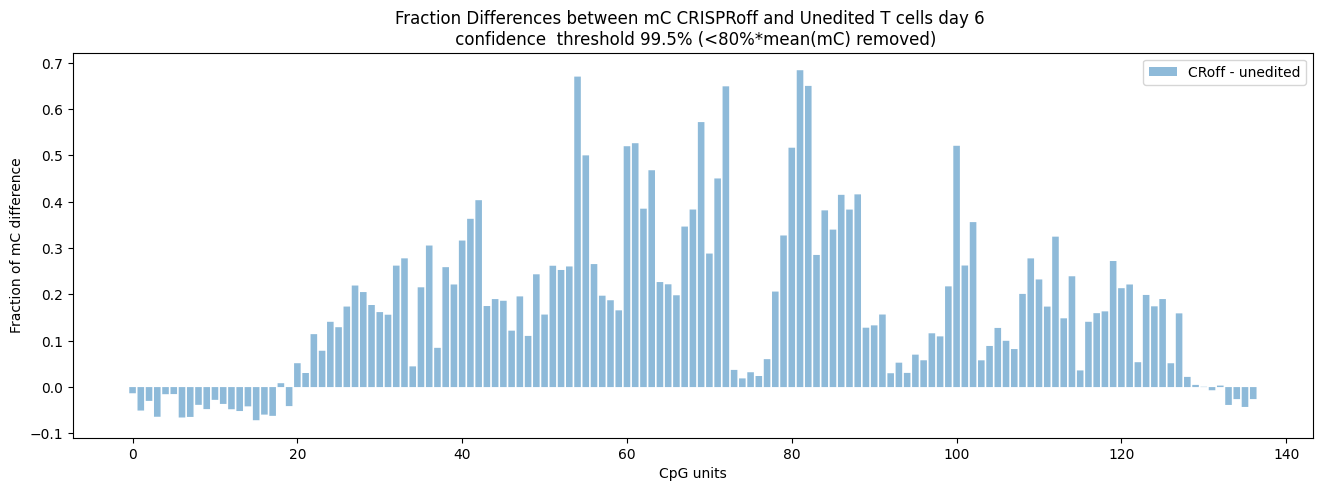

In [ ]:
CGs_all_pd = CGs_all_unedited_mc0995_remove_low80
CGs_all_unedited_0995_remove_low80_sums = np.nansum(CGs_all_pd, axis=0) 
CGs_all_unedited_0995_remove_low80_frac = CGs_all_unedited_0995_remove_low80_sums  / len(CGs_all_pd) 

CGs_all_pd = CGs_all_CRoff_mc0995_remove_low80
CGs_all_CRoff_0995_remove_low80_sums = np.nansum(CGs_all_pd, axis=0) 
CGs_all_CRoff_0995_remove_low80_frac = CGs_all_CRoff_0995_remove_low80_sums  / len(CGs_all_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_CRoff_0995_remove_low80_frac)), CGs_all_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_all_unedited_0995_remove_low80_frac)), CGs_all_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; >80% * mean(mC)')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_all_CRoff_0995_remove_low80_frac - CGs_all_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% (<80%*mean(mC) removed)')
plt.legend()

# Show the plot
plt.show()

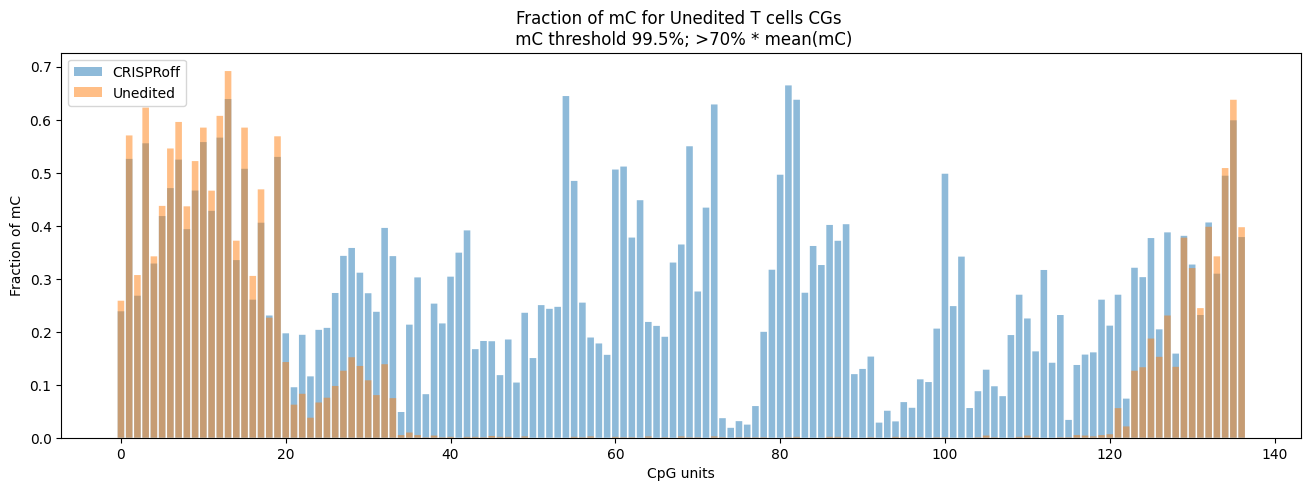

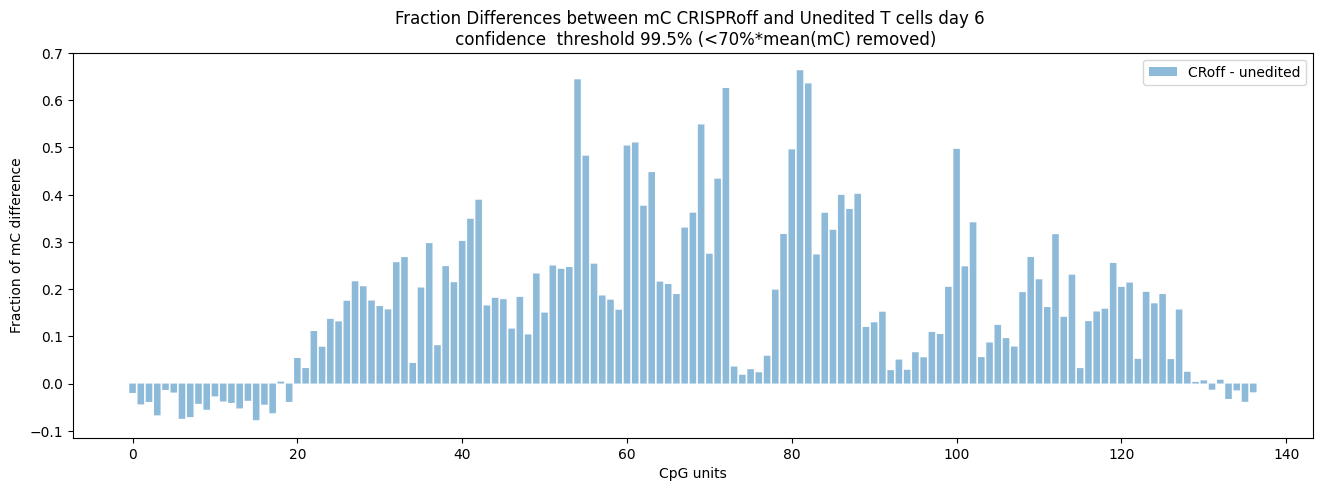

In [ ]:
CGs_all_pd = CGs_all_unedited_mc0995_remove_low70
CGs_all_unedited_0995_remove_low70_sums = np.nansum(CGs_all_pd, axis=0) 
CGs_all_unedited_0995_remove_low70_frac = CGs_all_unedited_0995_remove_low70_sums  / len(CGs_all_pd) 

CGs_all_pd = CGs_all_CRoff_mc0995_remove_low70
CGs_all_CRoff_0995_remove_low70_sums = np.nansum(CGs_all_pd, axis=0) 
CGs_all_CRoff_0995_remove_low70_frac = CGs_all_CRoff_0995_remove_low70_sums  / len(CGs_all_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_CRoff_0995_remove_low70_frac)), CGs_all_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_all_unedited_0995_remove_low70_frac)), CGs_all_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; >70% * mean(mC)')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_all_CRoff_0995_remove_low70_frac - CGs_all_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% (<70%*mean(mC) removed)')
plt.legend()

# Show the plot
plt.show()

Padded reads loaded successfully.


((1097, 137),
 array([[nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        [nan, nan, nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

Padded reads loaded successfully.


((1219, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

Padded reads loaded successfully.


((1347, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

Padded reads loaded successfully.


((1342, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

Padded reads loaded successfully.


((1361, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [ 1.,  1.,  1., ...,  1., nan, nan],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1.,  1.,  1.]]))

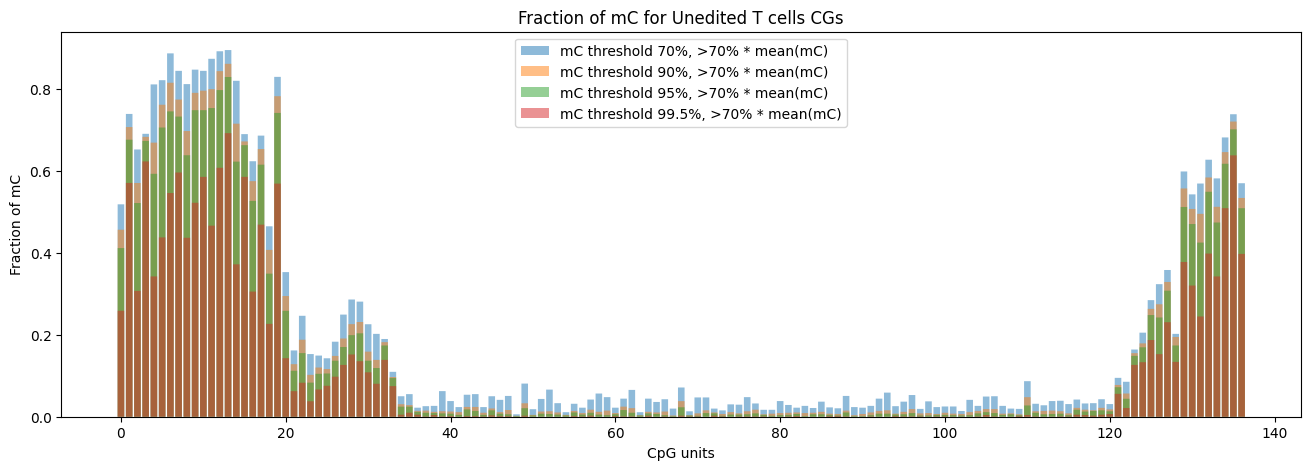

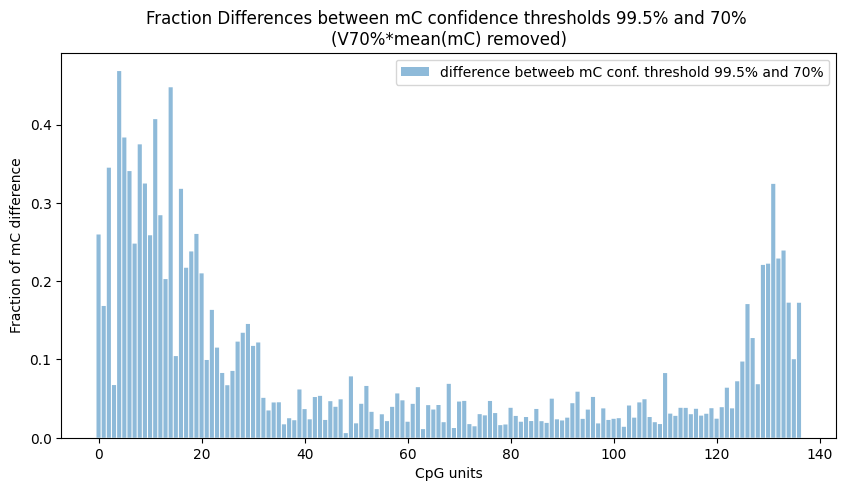

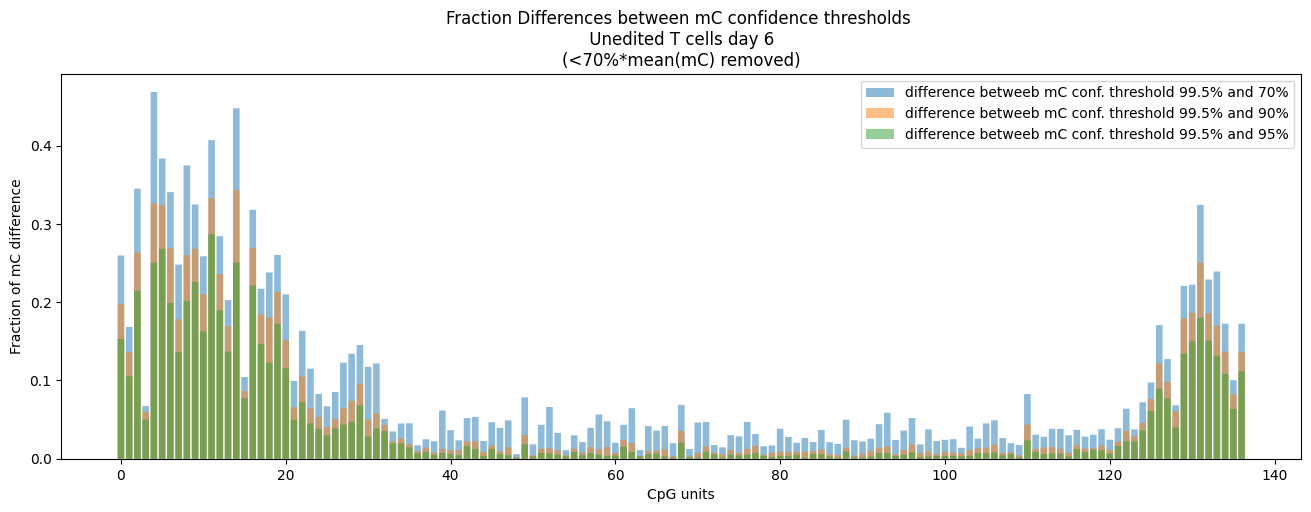

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff
experiment_name =  day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in chr1_206560169_206614236.sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES…

          |    0%

          | Transferring 10130 from reads.CG,0.txt into reads.combined_basemods.h5, new size 10130   0% | 00:0…

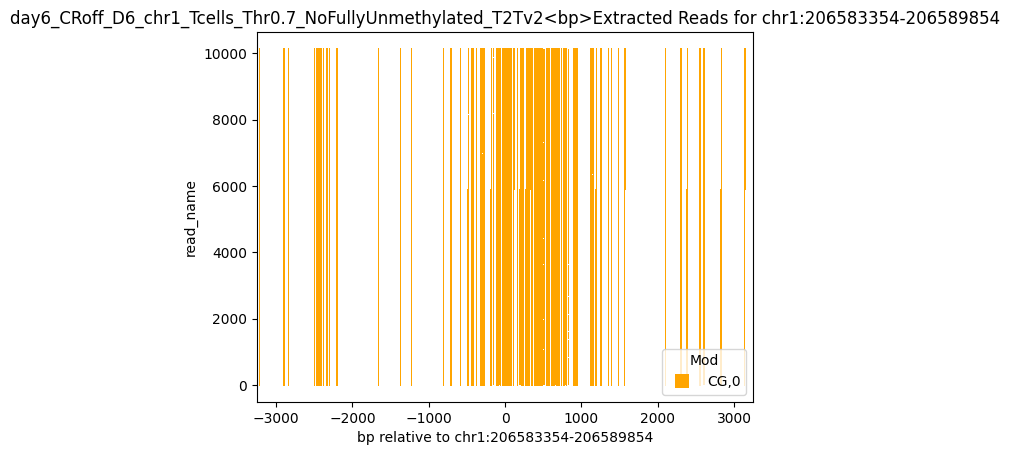

Found read coordinates: 10130 reads
Unique read names with methylation: 10082
Found 3453 reads with full coverage
Reads with methylation data: 10082
Overlap between full coverage and methylation: 3439
After full coverage filtering: 193215 reads with methylation data
Final result: 193215 reads with methylation information out of 10130 total reads


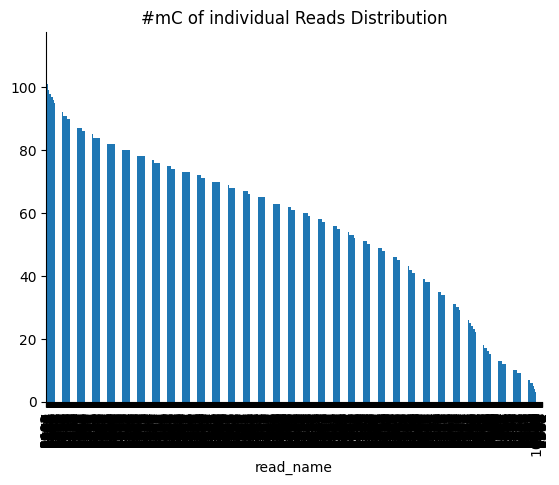

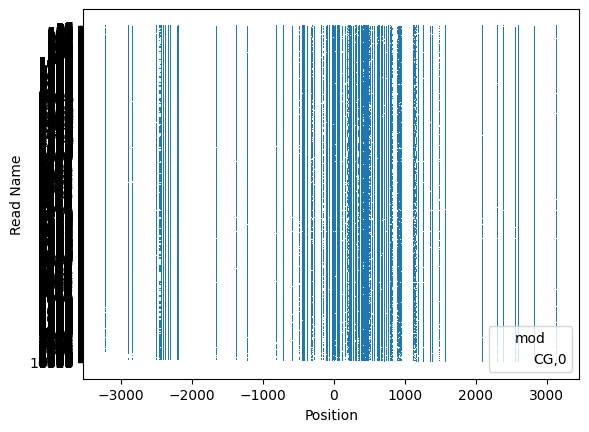

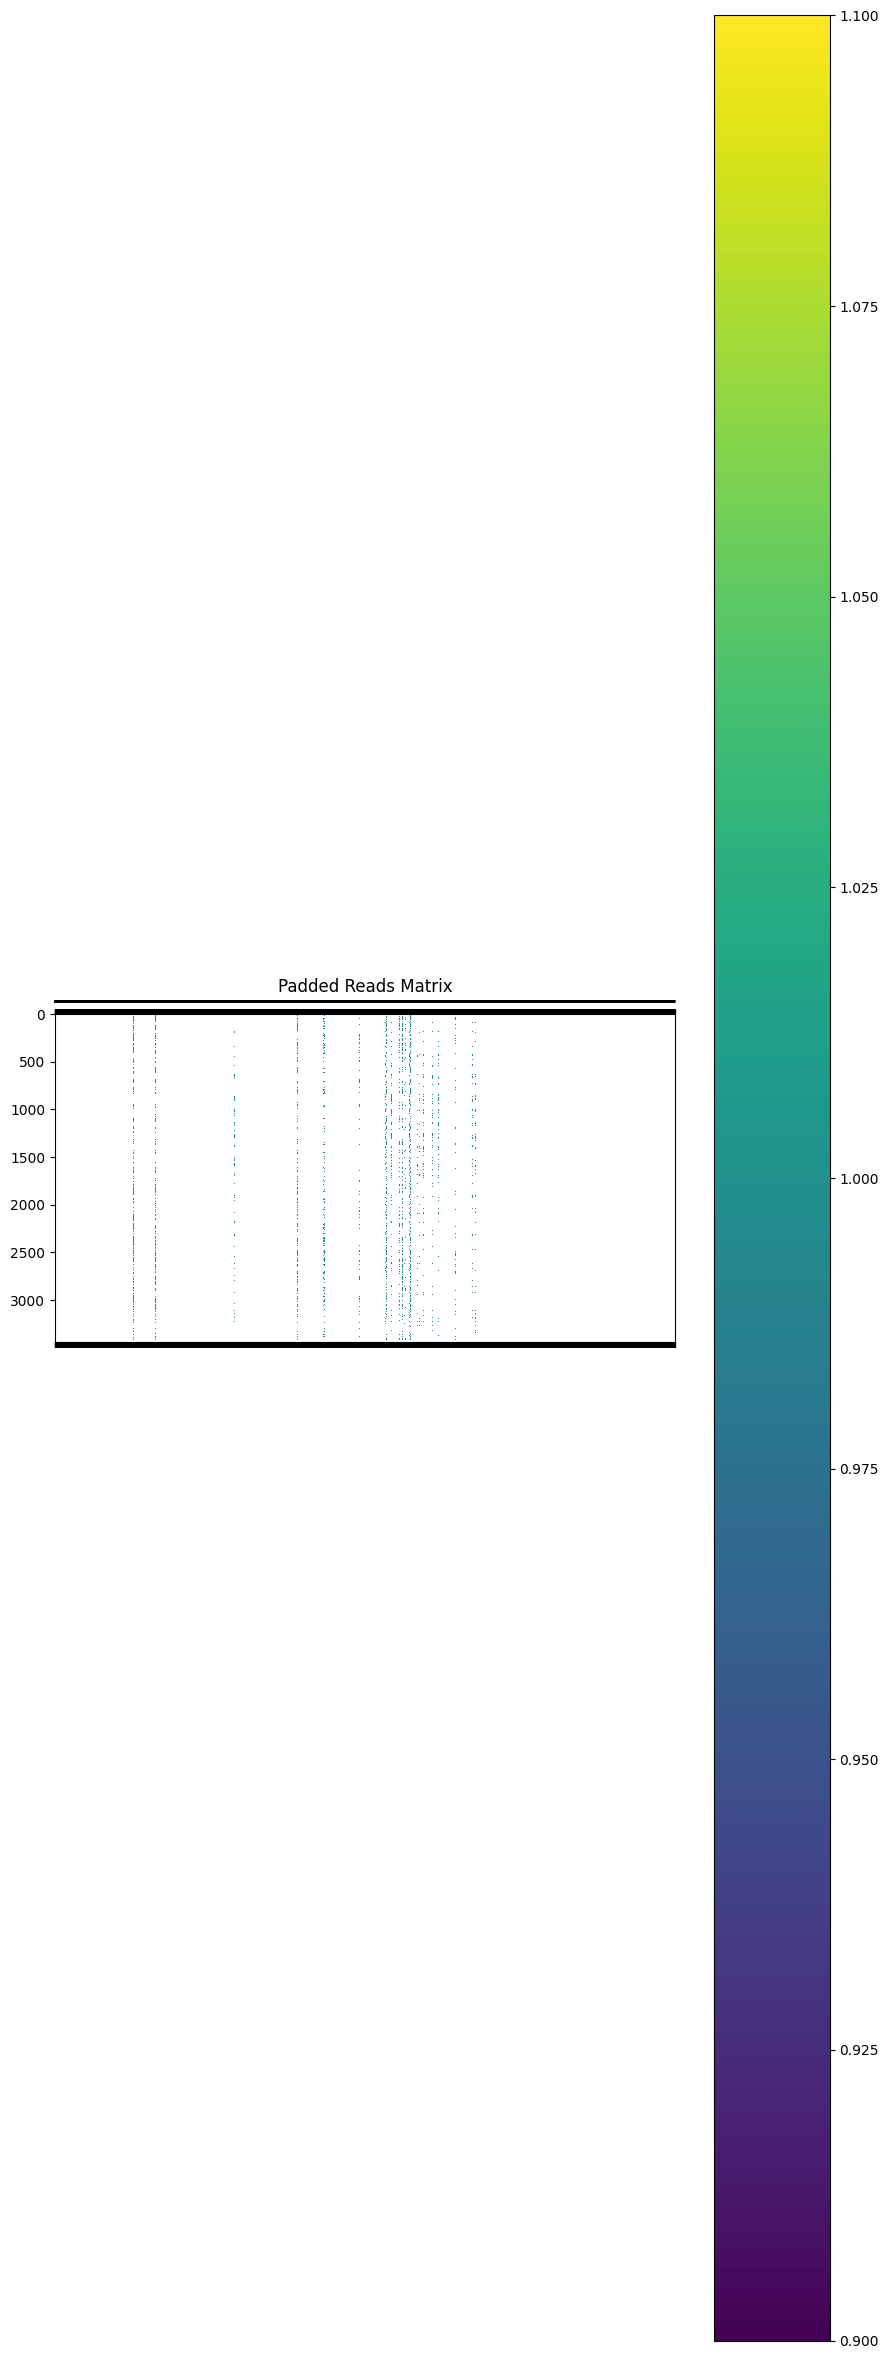

Padded reads saved to padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


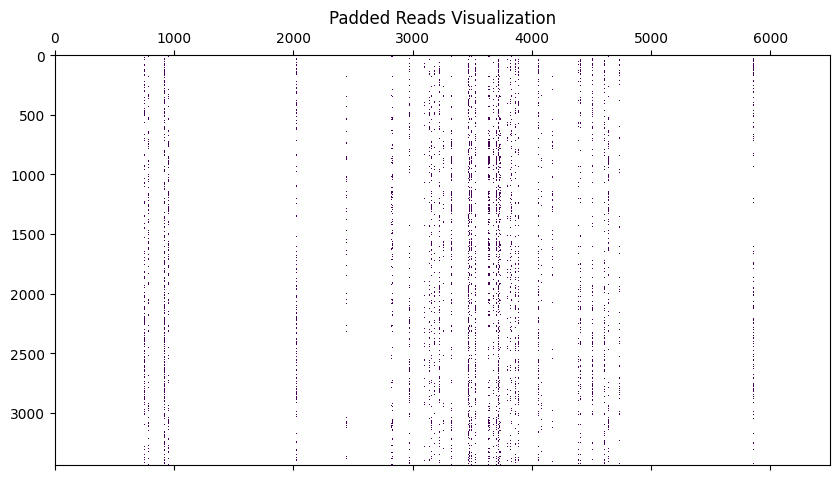

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

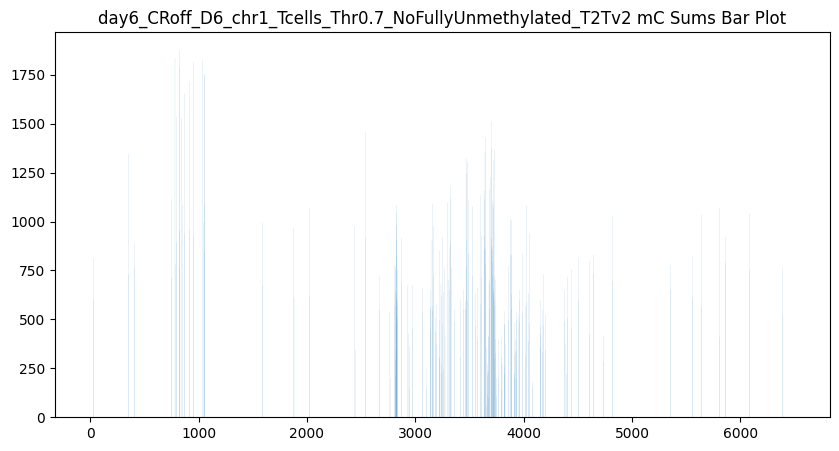

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


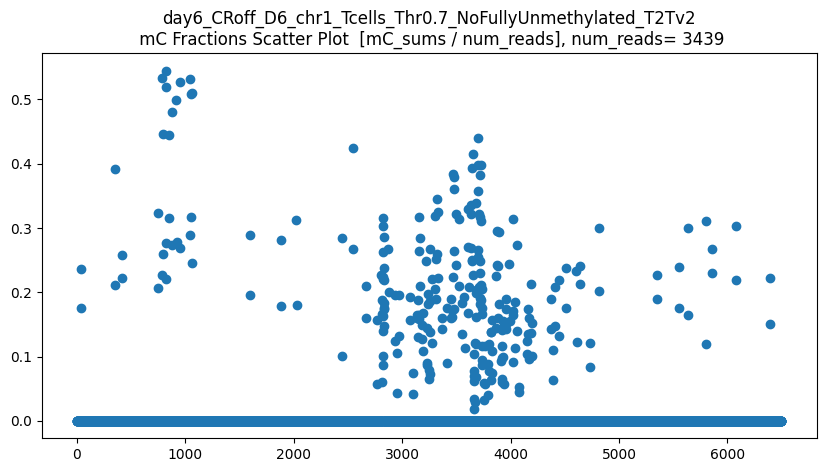

len(CGs_all) = 3439
CGs_all.shape = (3439, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


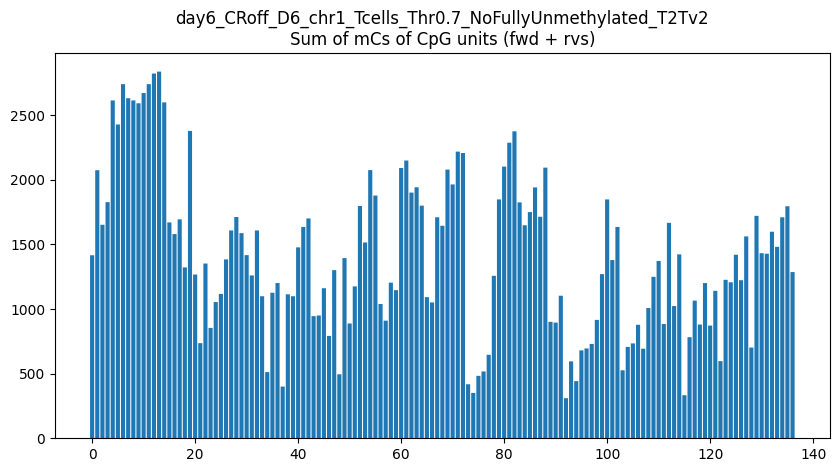

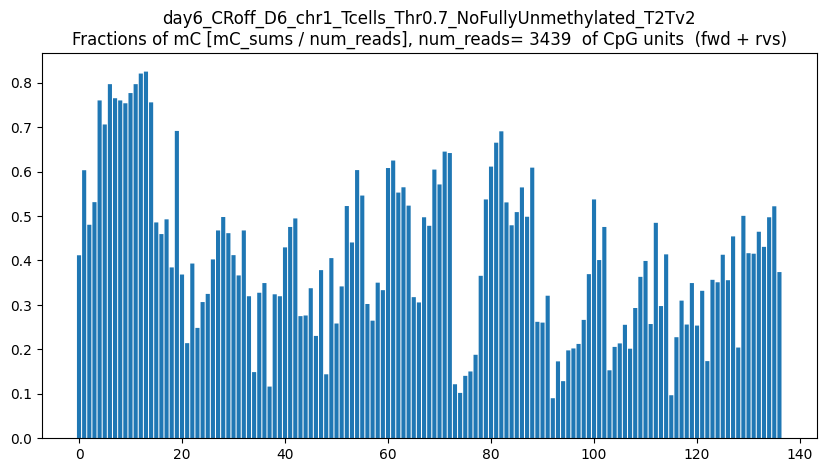

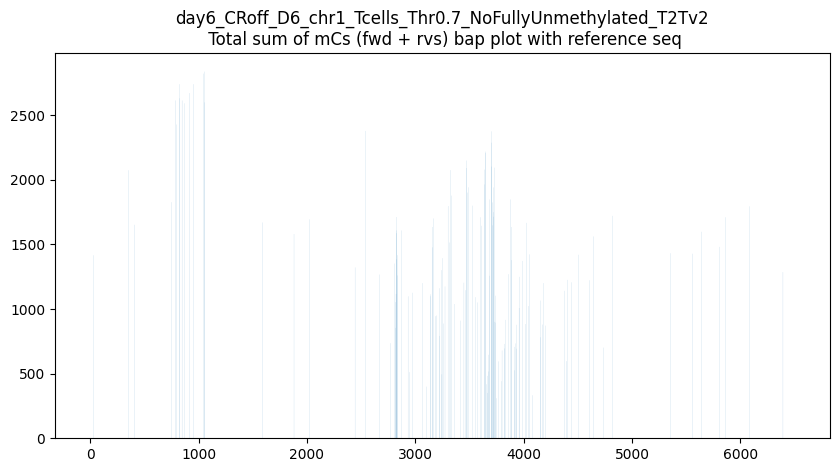

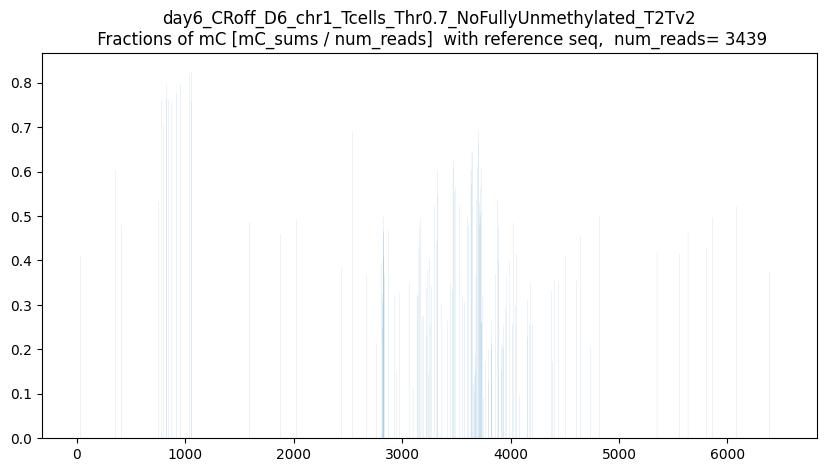

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



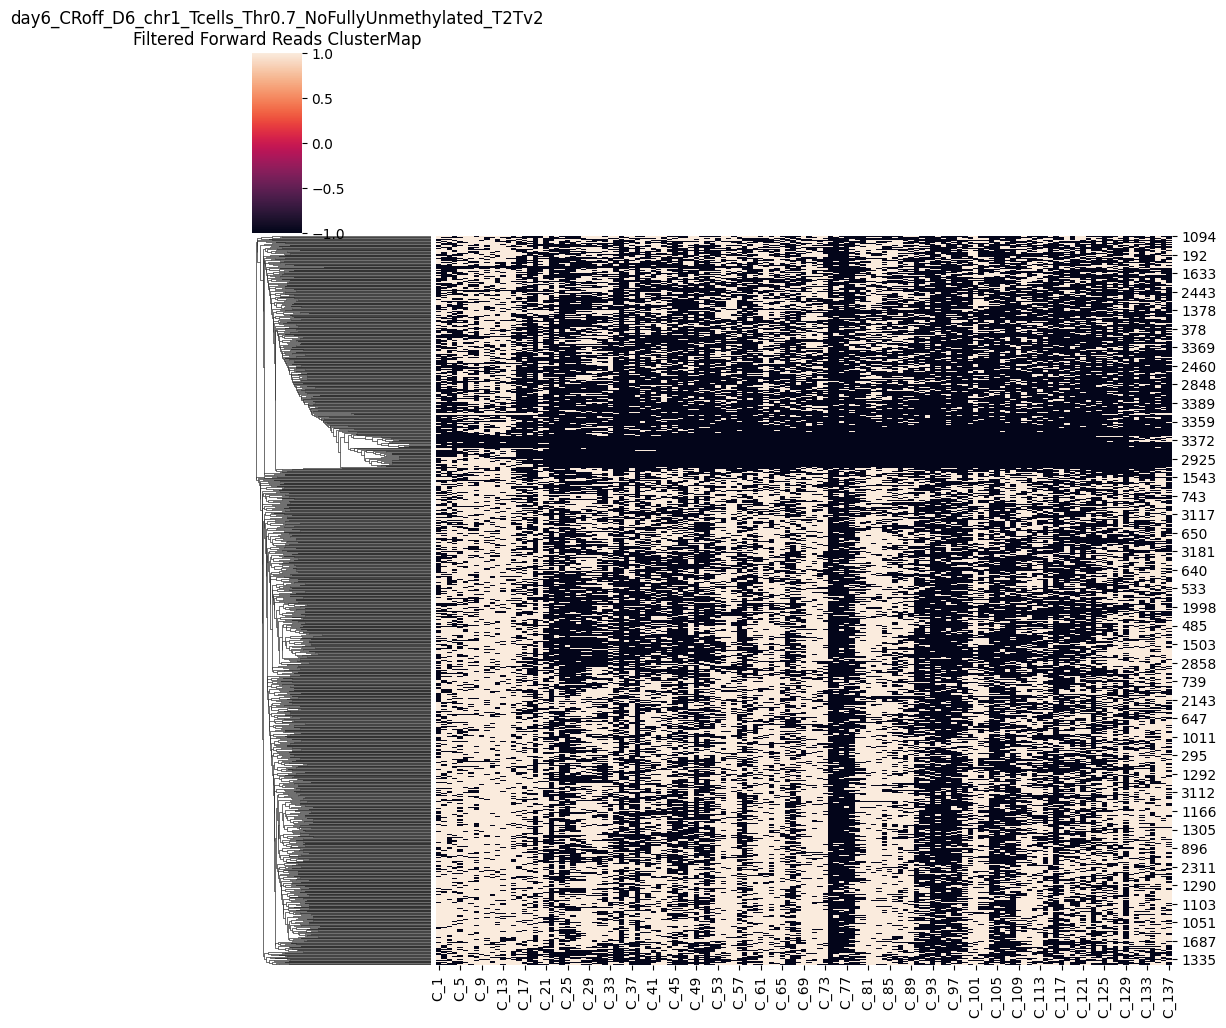

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



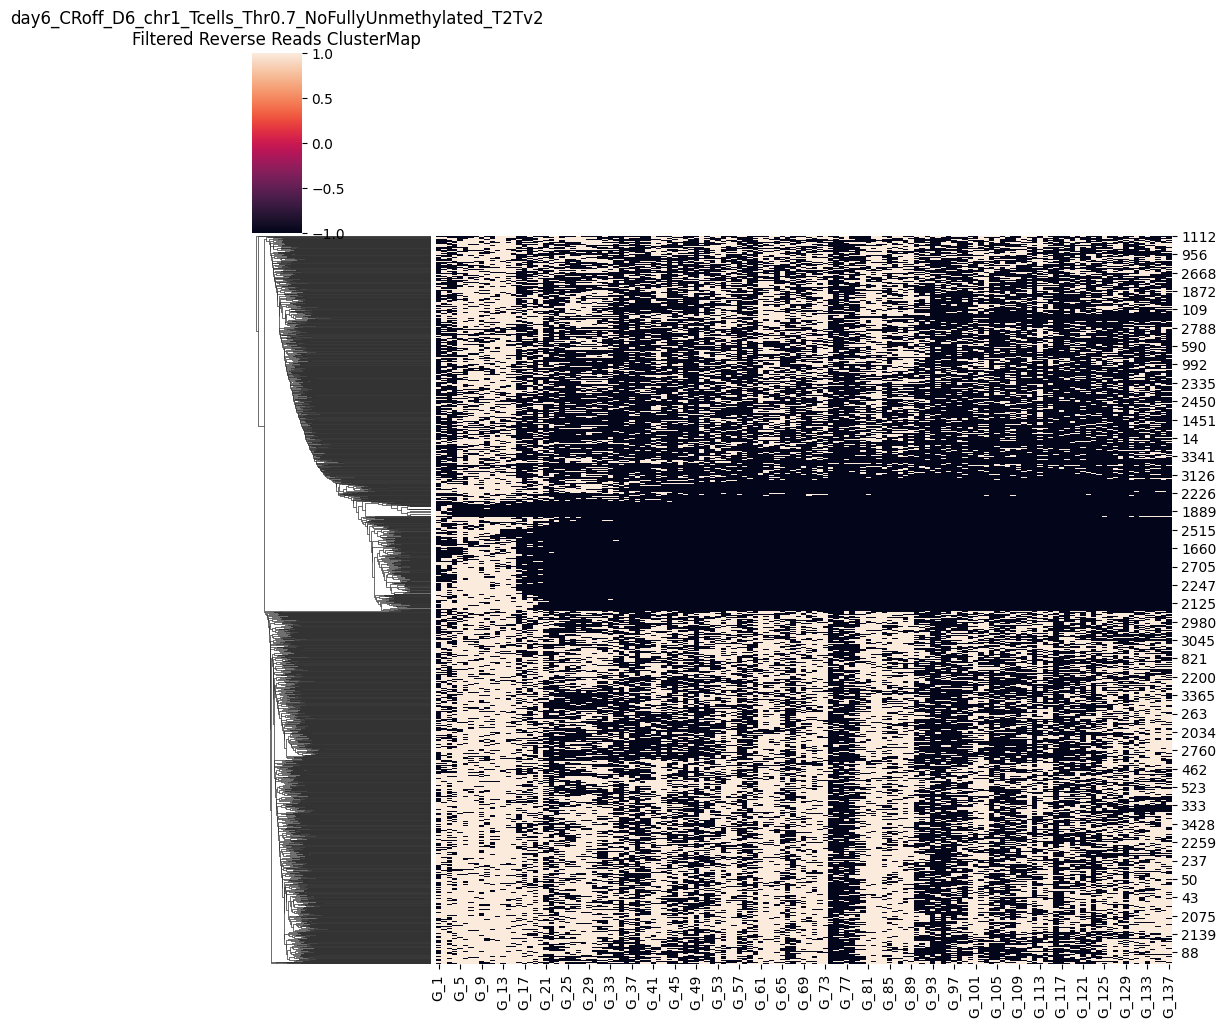

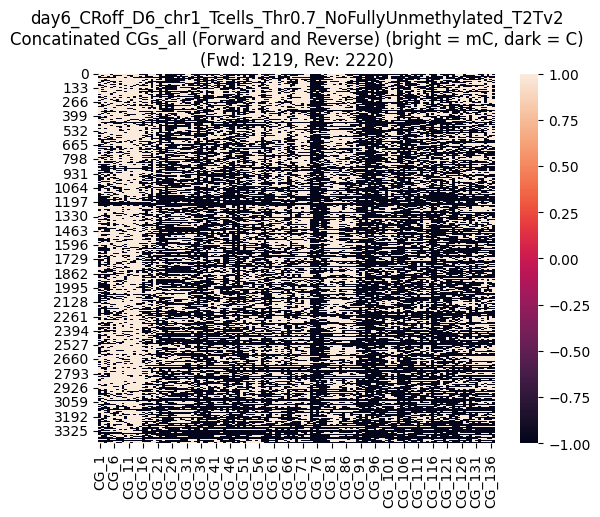

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



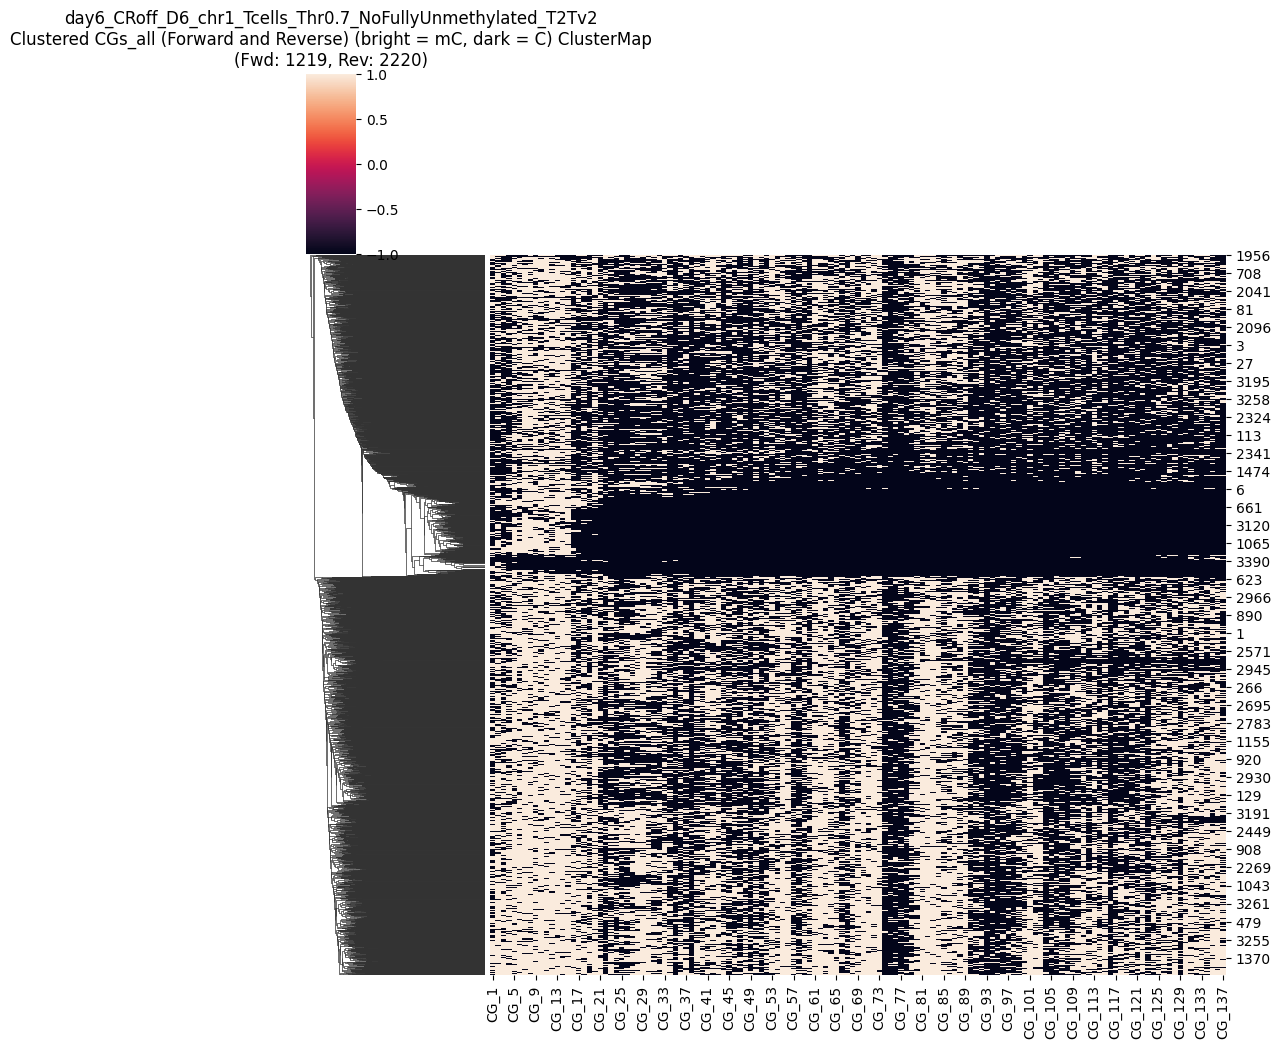

CGs_all saved as CG_137_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1219_numRVS2220.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1      NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0    NaN  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN   1.0    NaN  ...   
4      NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
3434   NaN   1.0   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...   
3435   1.0   1.0   NaN   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...   
3436   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0    NaN  ...   
3437   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...   
3438   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        1.0     NaN     1.0     NaN     NaN     NaN     NaN     1.0     NaN   
2        NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     1.0   
3        1.0     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
4        1.0     NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3434     1.0     1.0     1.0     1.0     NaN     NaN     1.0     1.0     1.0   
3435     1.0     NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0   
3436     1.0     1.0     1.0     1.0     1.0     1.0     NaN     NaN     NaN   
3437     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3438     NaN     NaN     1.0     NaN     NaN     1.0     1.0     NaN     1.0   

      CG_137  
0        1.0  
1        NaN  
2        1.0  
3        NaN  
4        1.0  
...      ...  
3434     NaN  
3435     1.0  
3436     NaN  
3437     NaN  
3438     NaN  

[3439 rows x 137 columns]

Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (100% of max): 61.00
Original number of reads: 3439
Number of reads after filtering: 1775
Removed 1664 reads


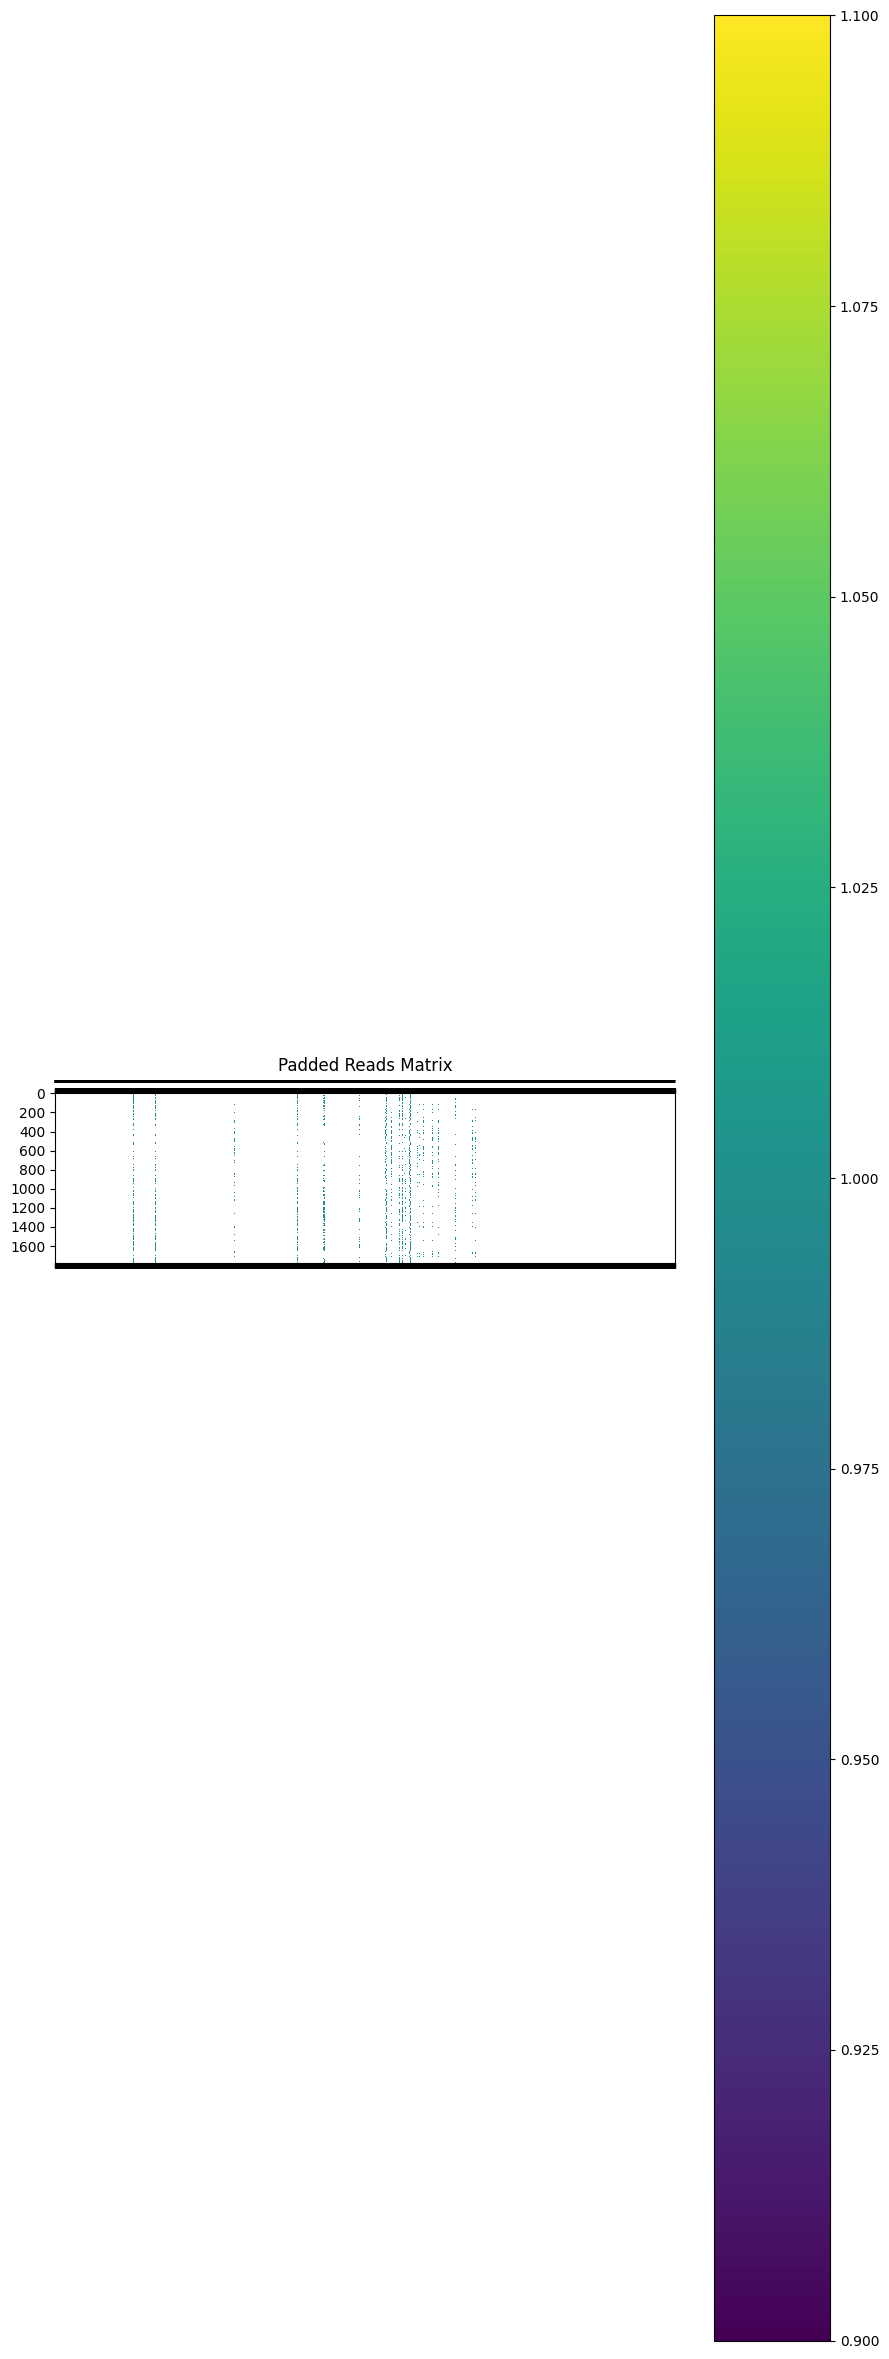

Padded reads saved to removed_low100_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


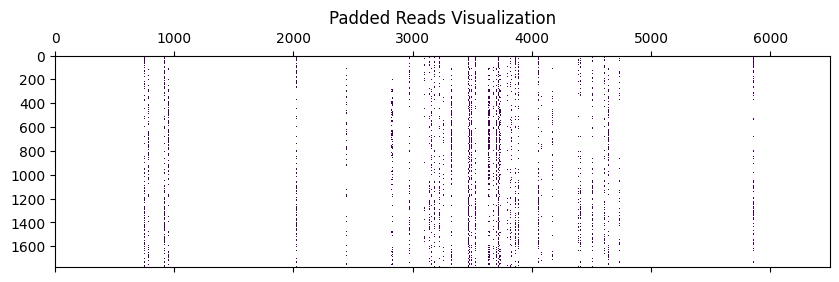

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

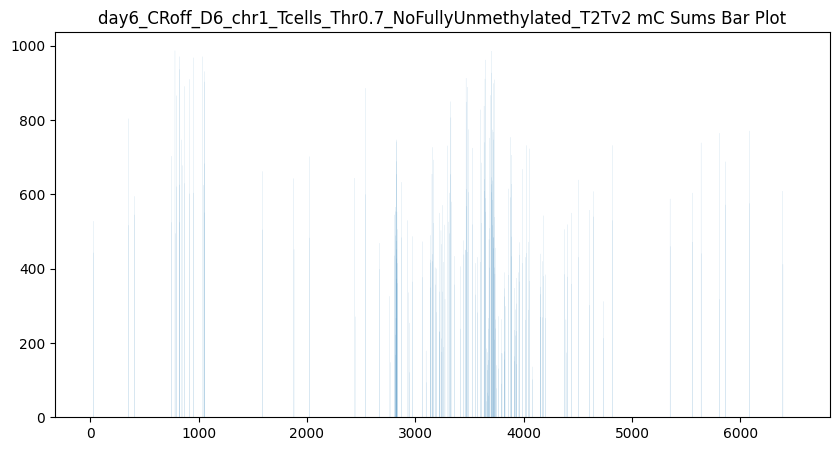

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


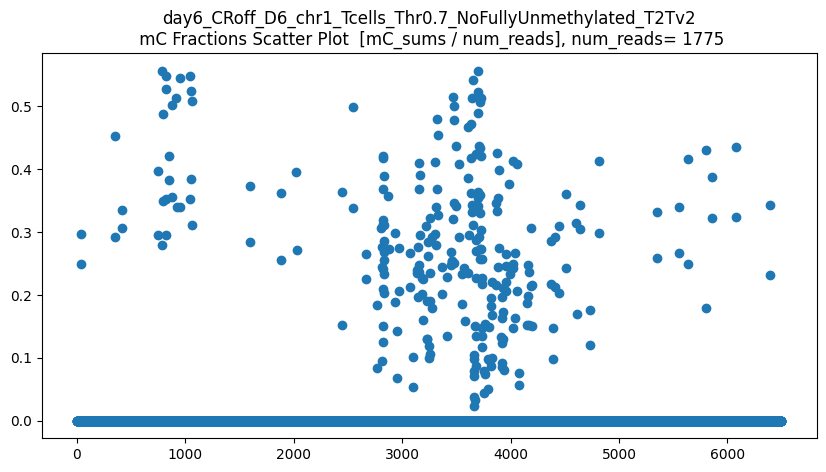

len(CGs_all) = 1775
CGs_all.shape = (1775, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


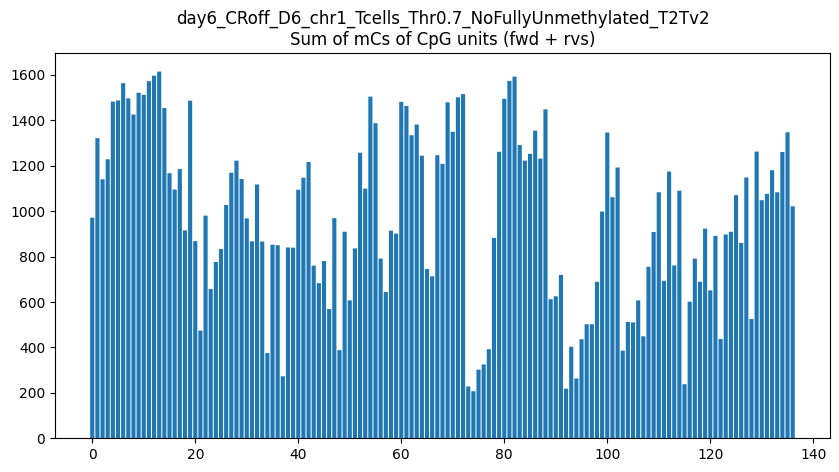

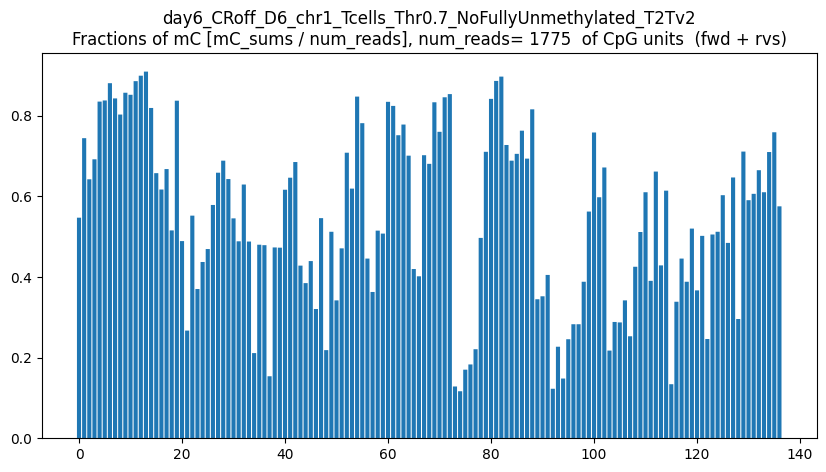

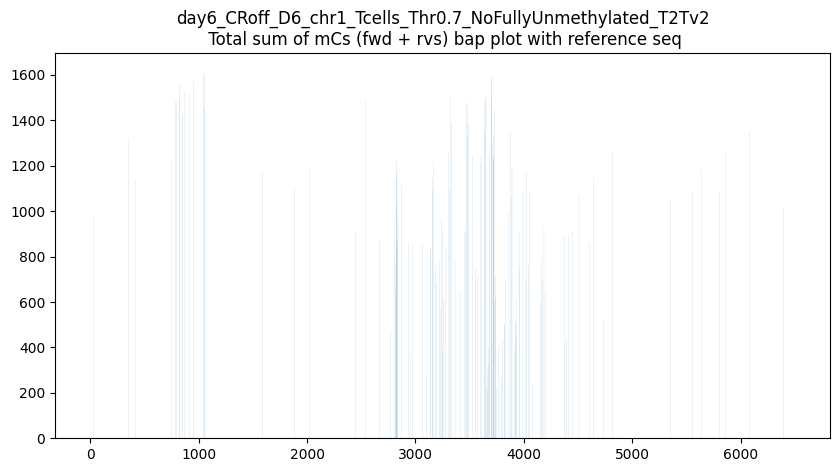

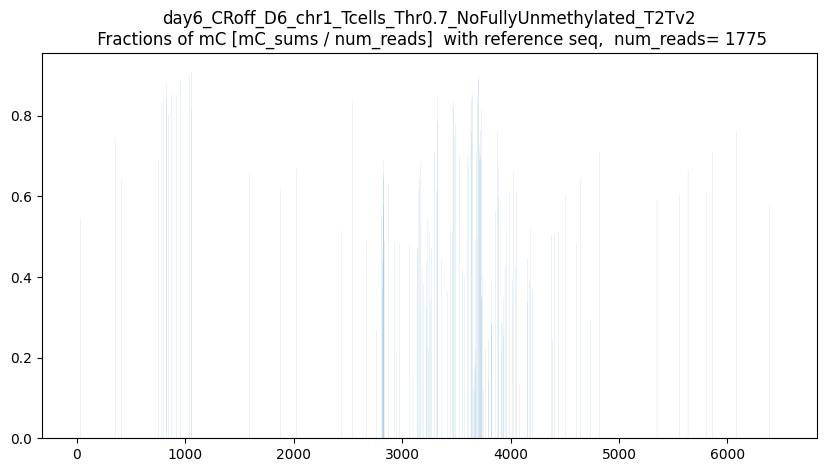

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



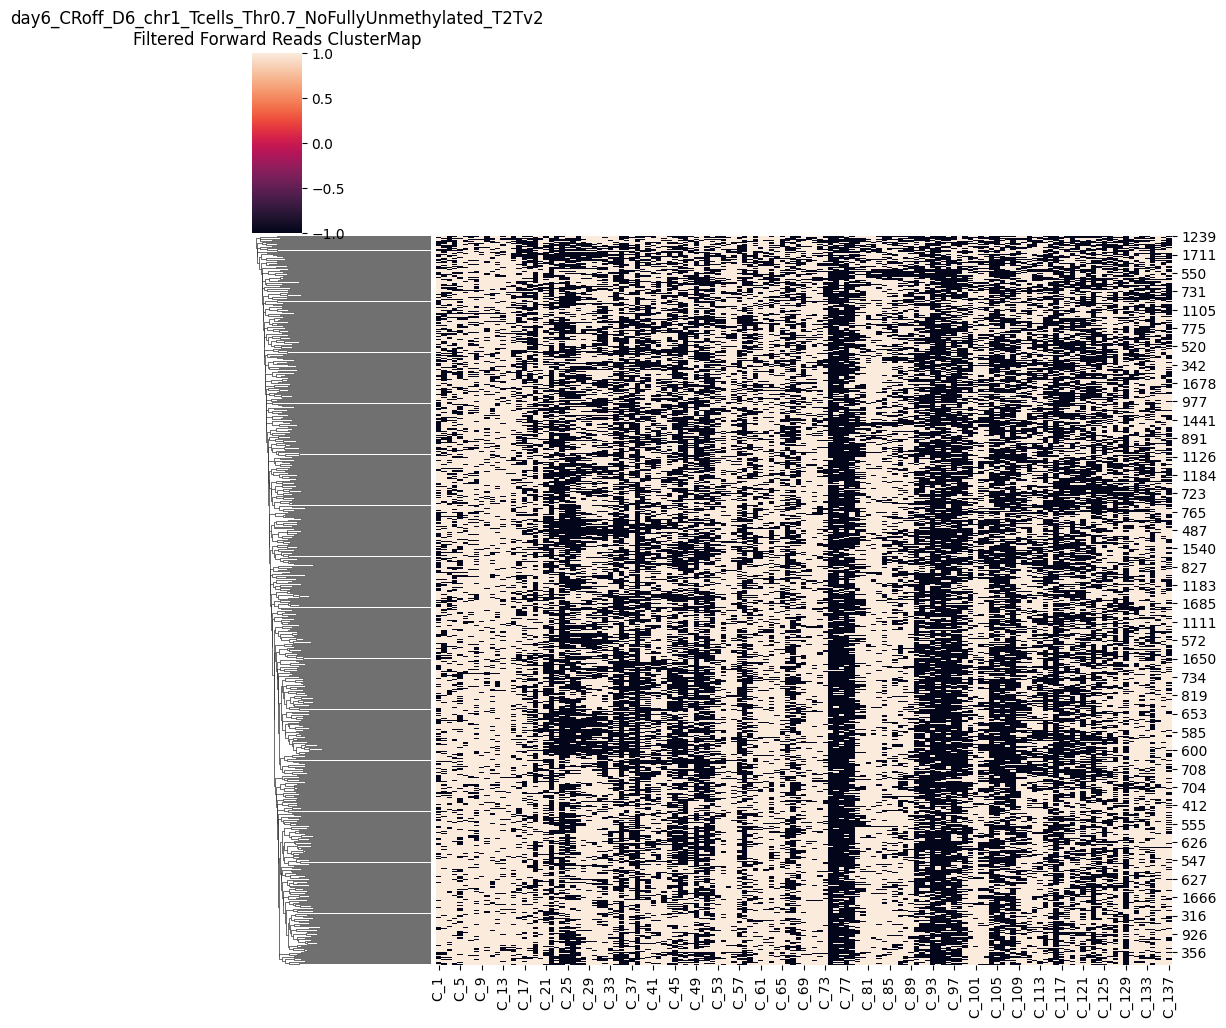

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



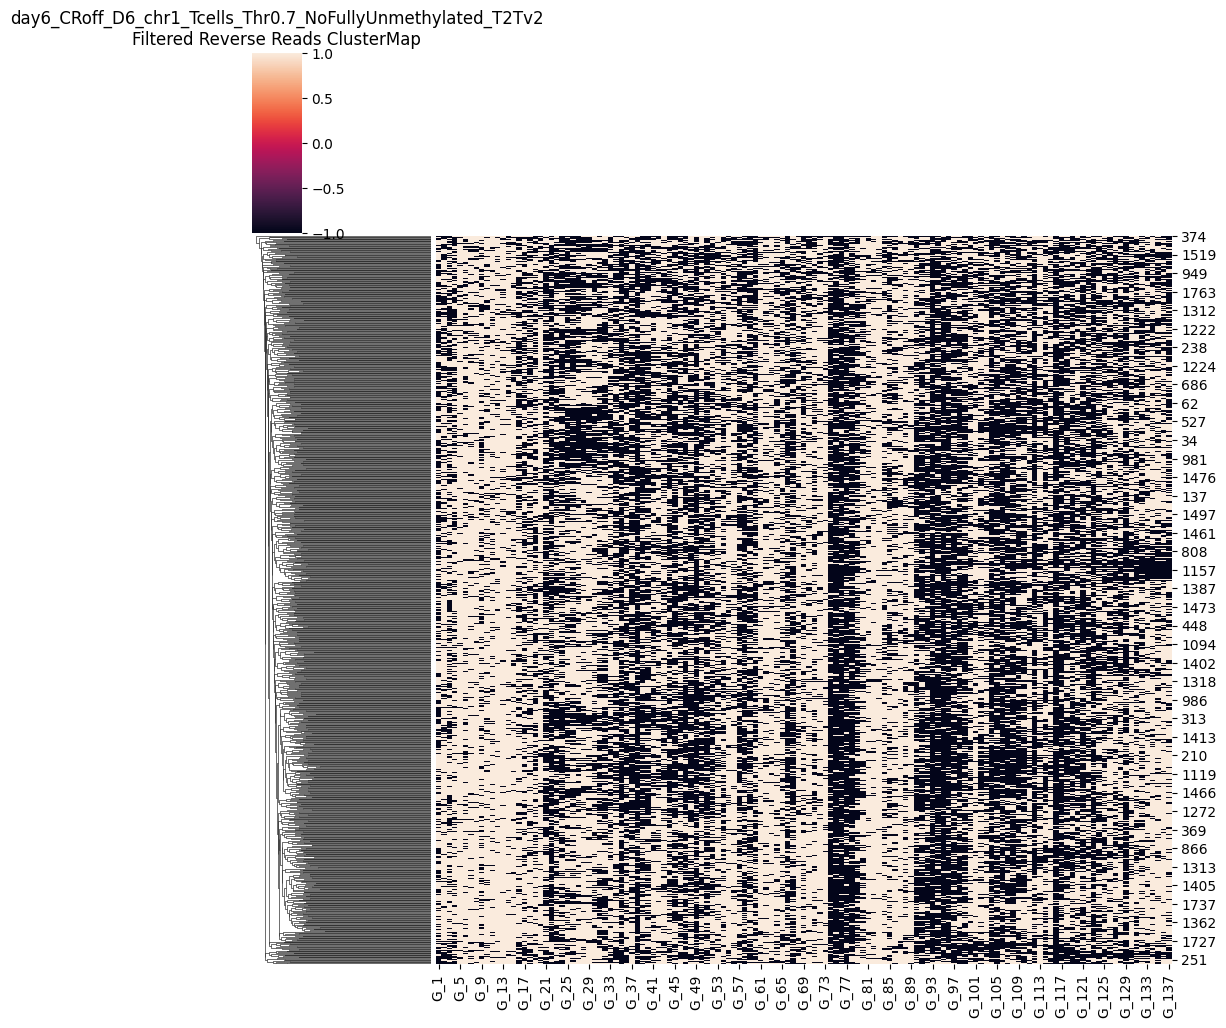

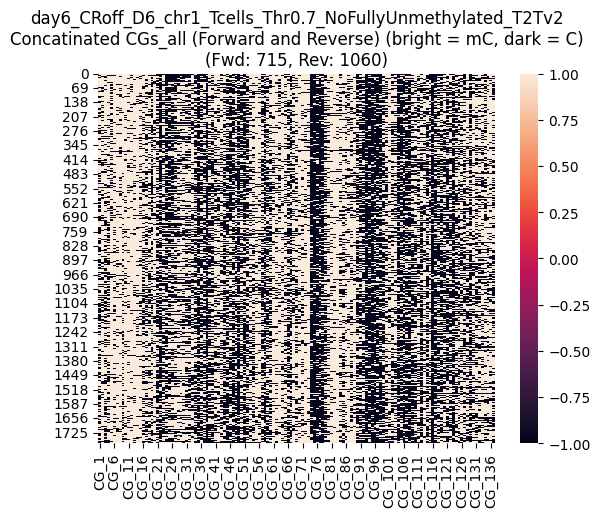

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



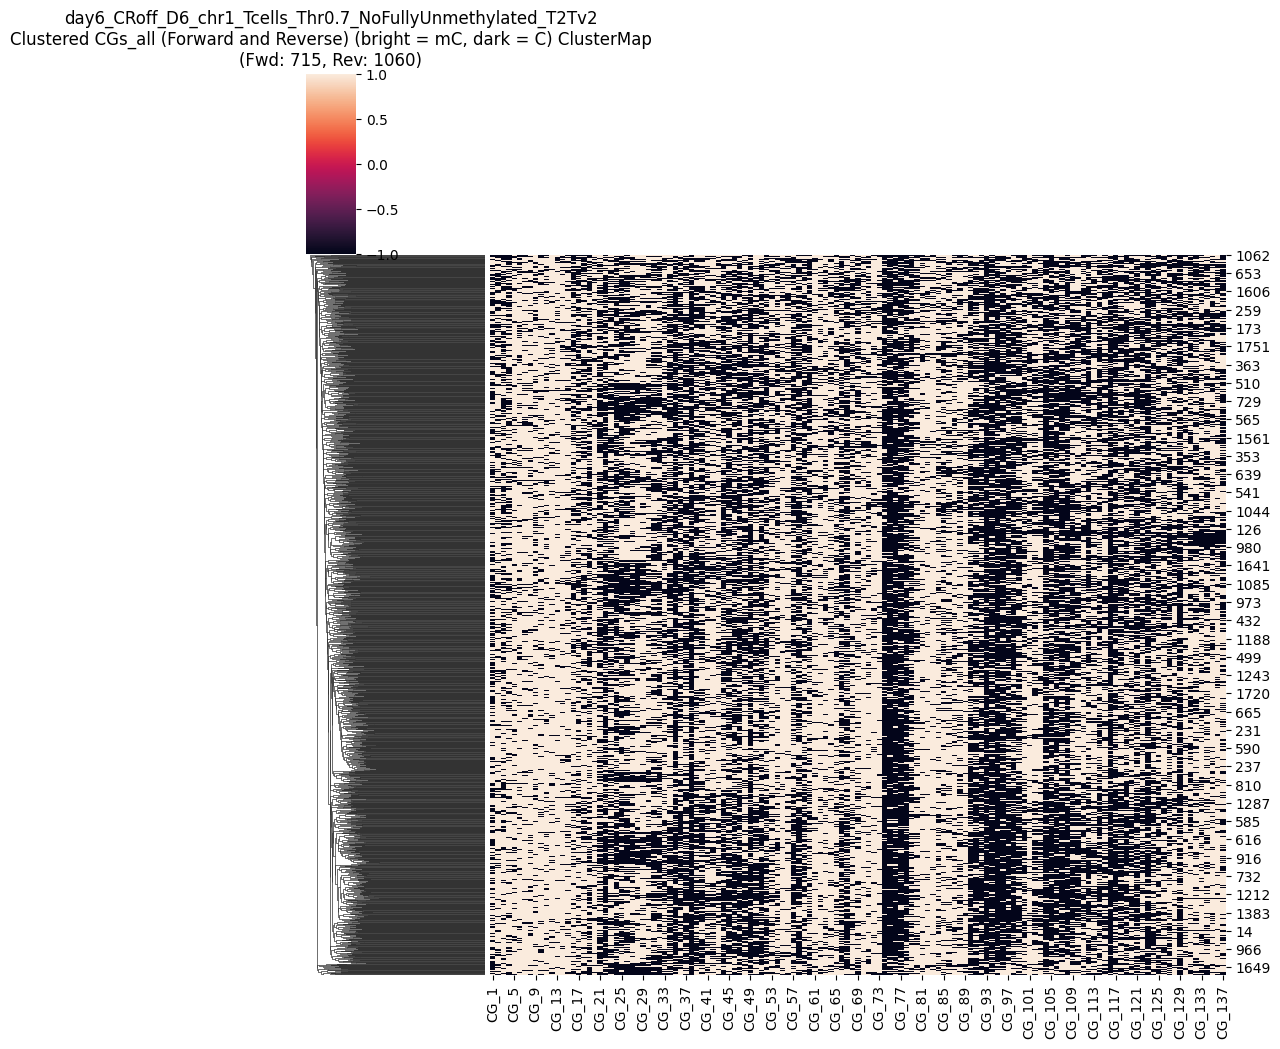

CGs_all saved as CG_137_removed_low100_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD715_numRVS1060.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (80% of max): 48.80
Original number of reads: 3439
Number of reads after filtering: 2329
Removed 1110 reads


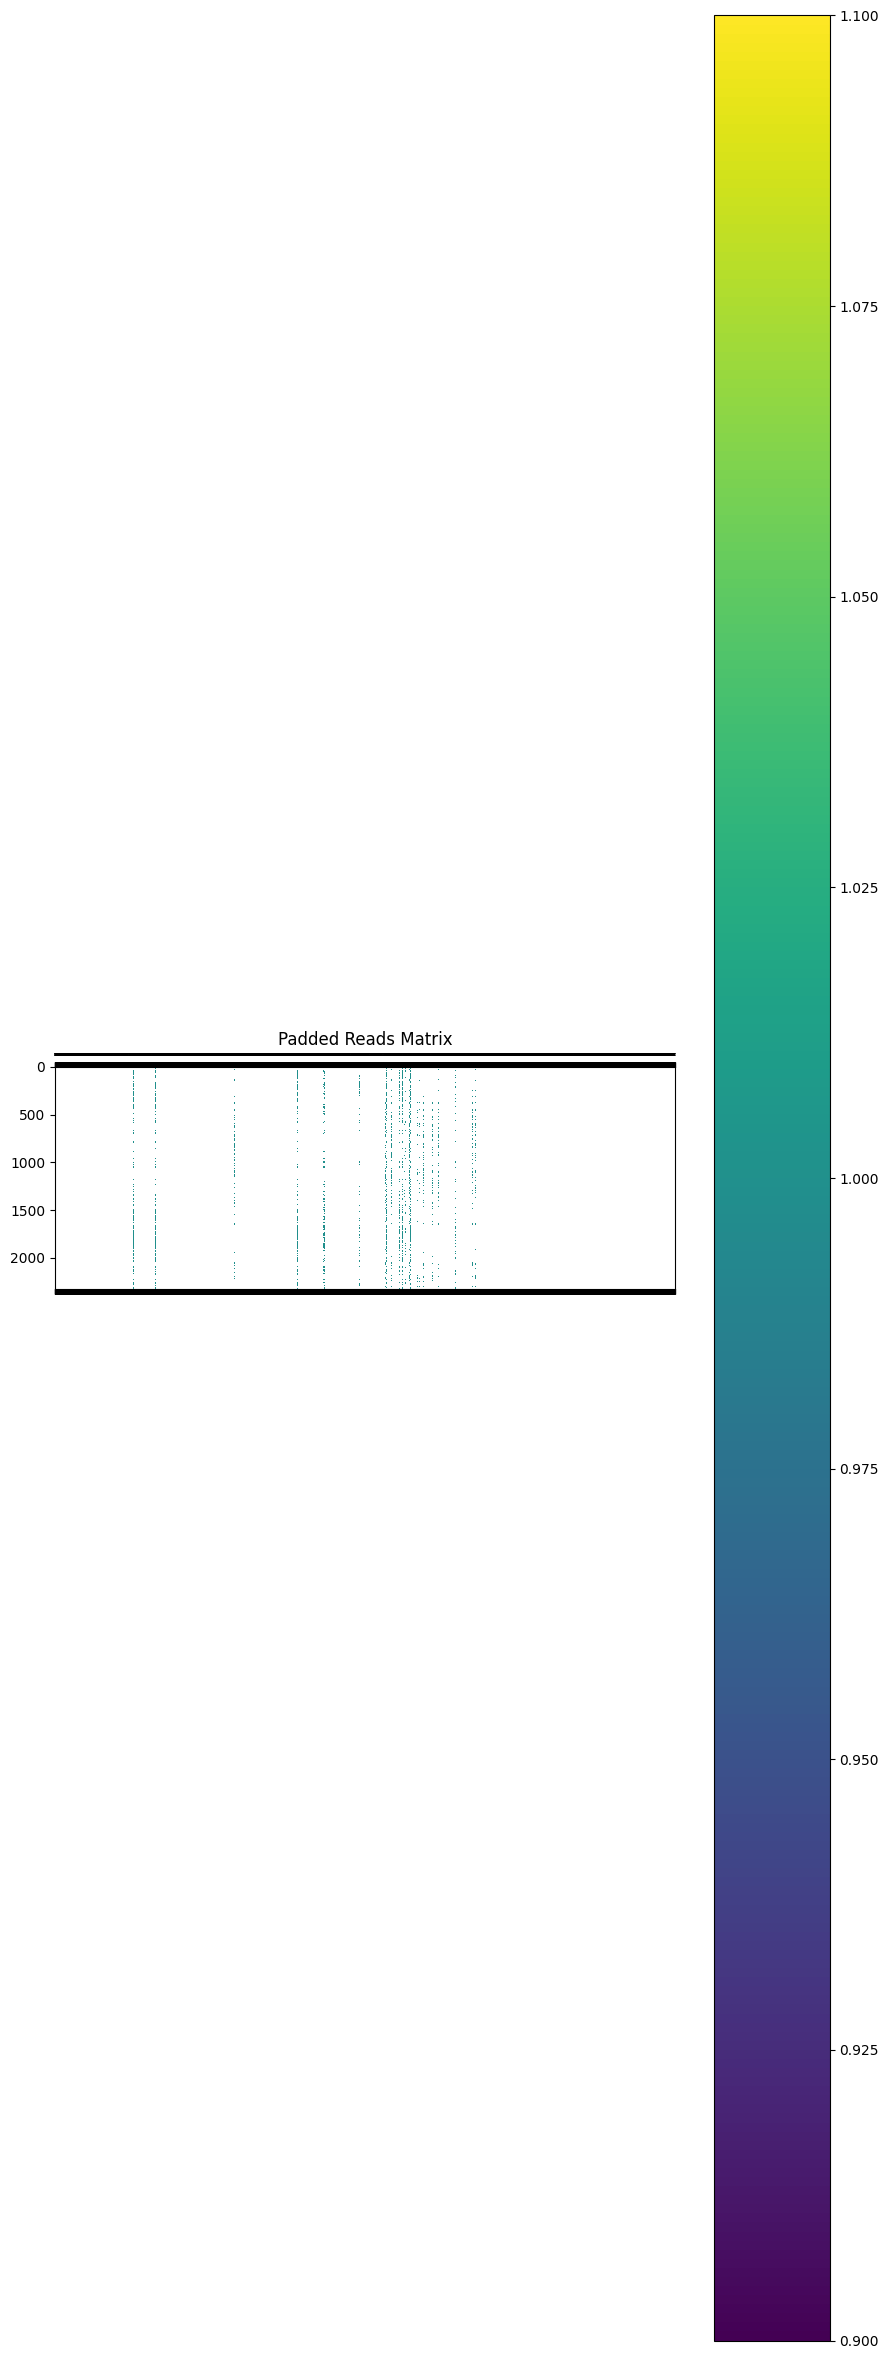

Padded reads saved to removed_low80_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


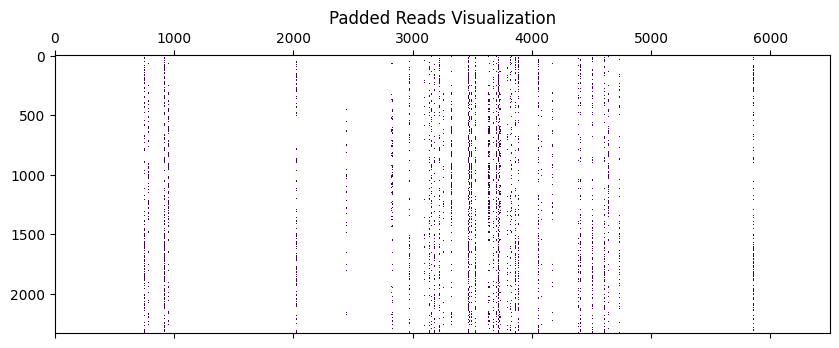

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

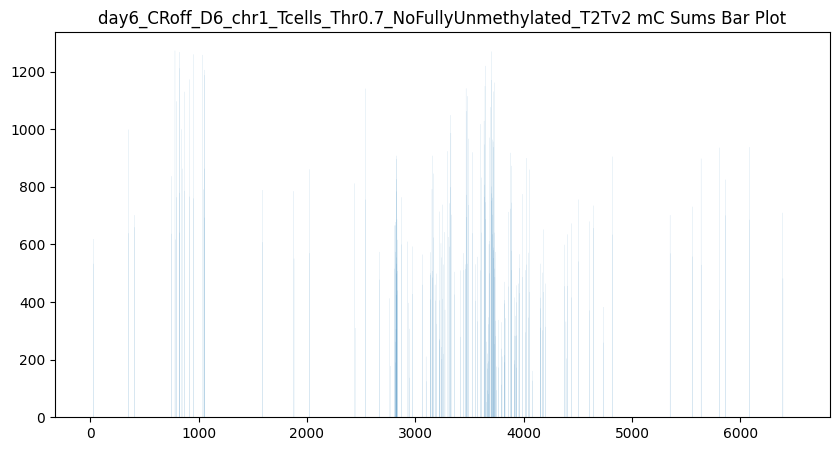

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


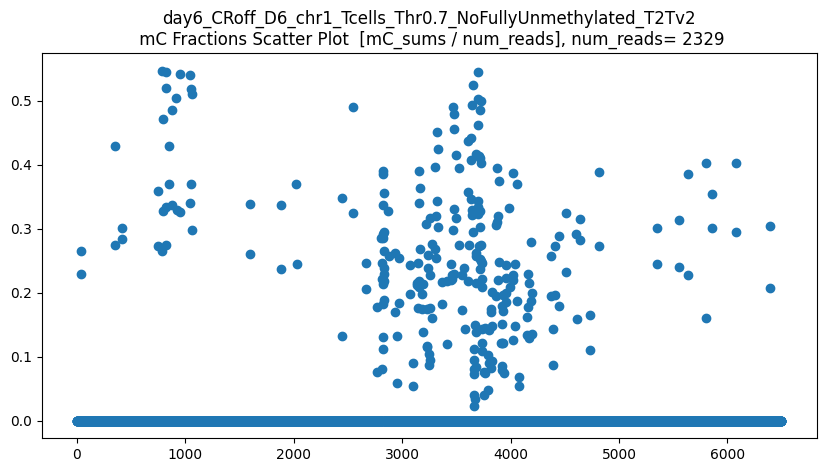

len(CGs_all) = 2329
CGs_all.shape = (2329, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


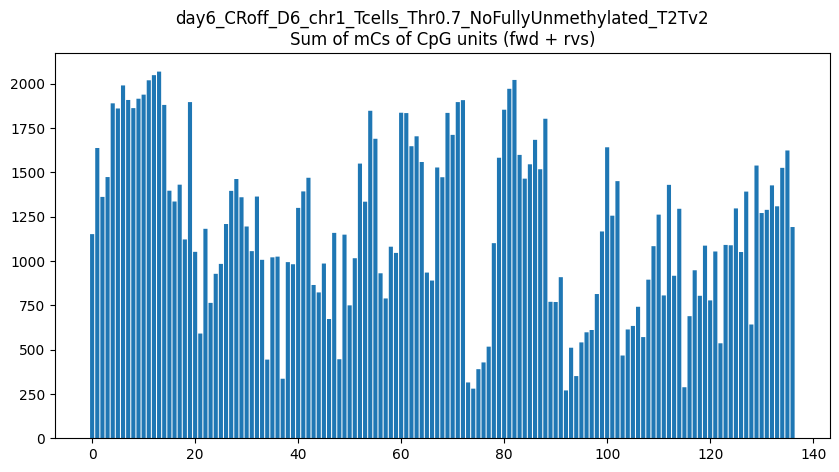

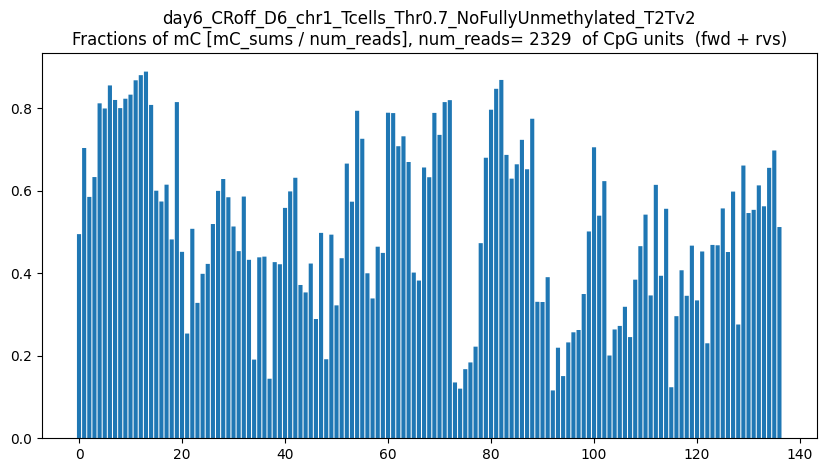

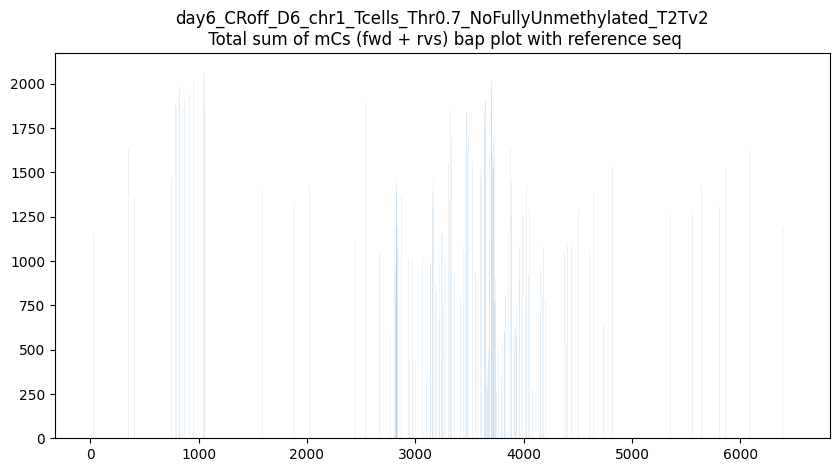

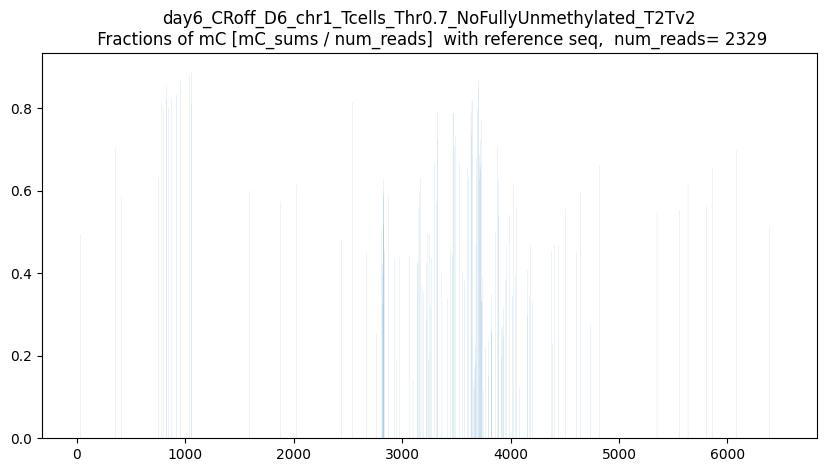

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



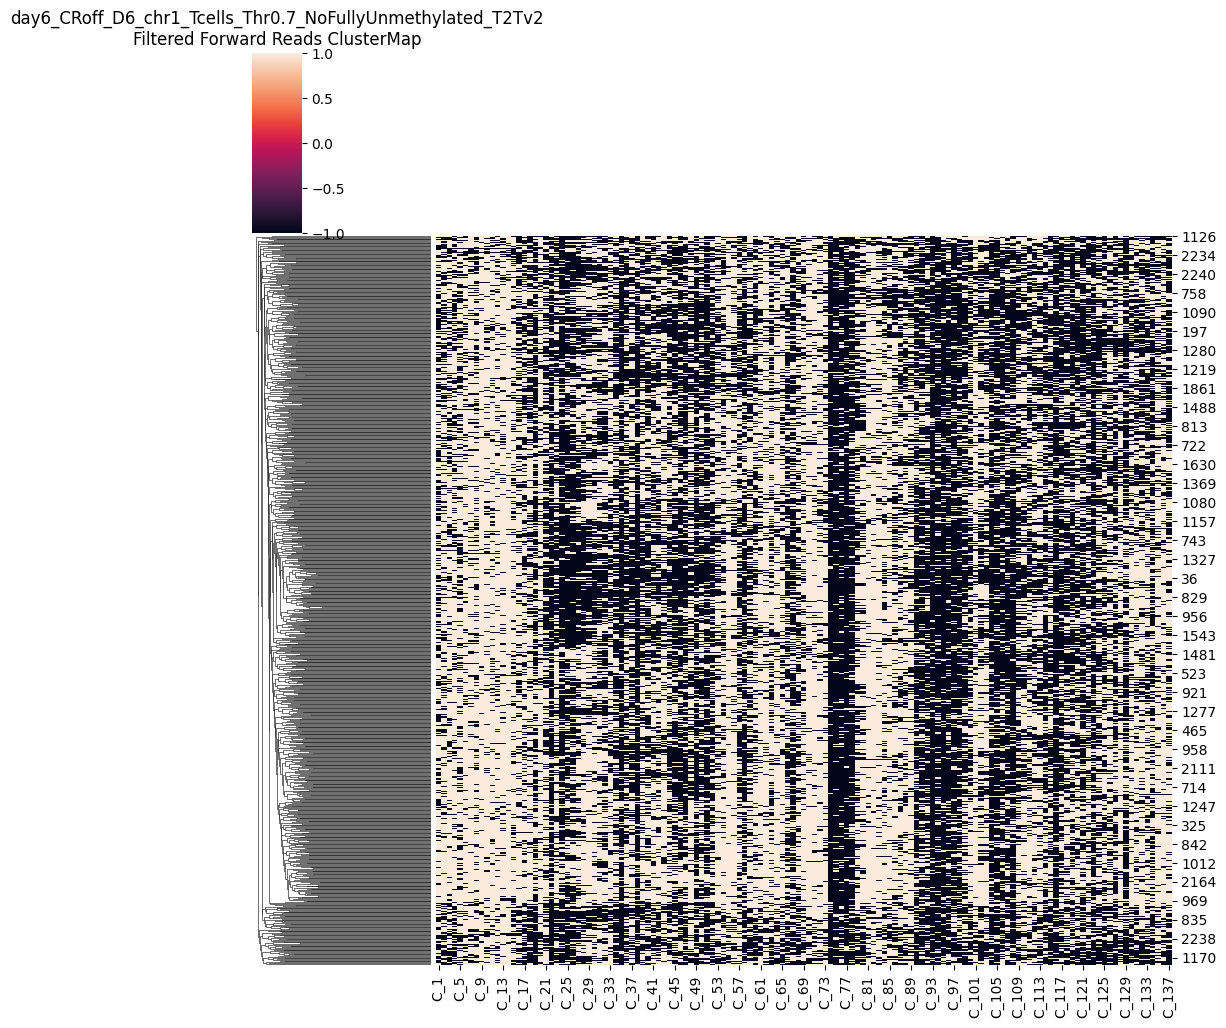

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



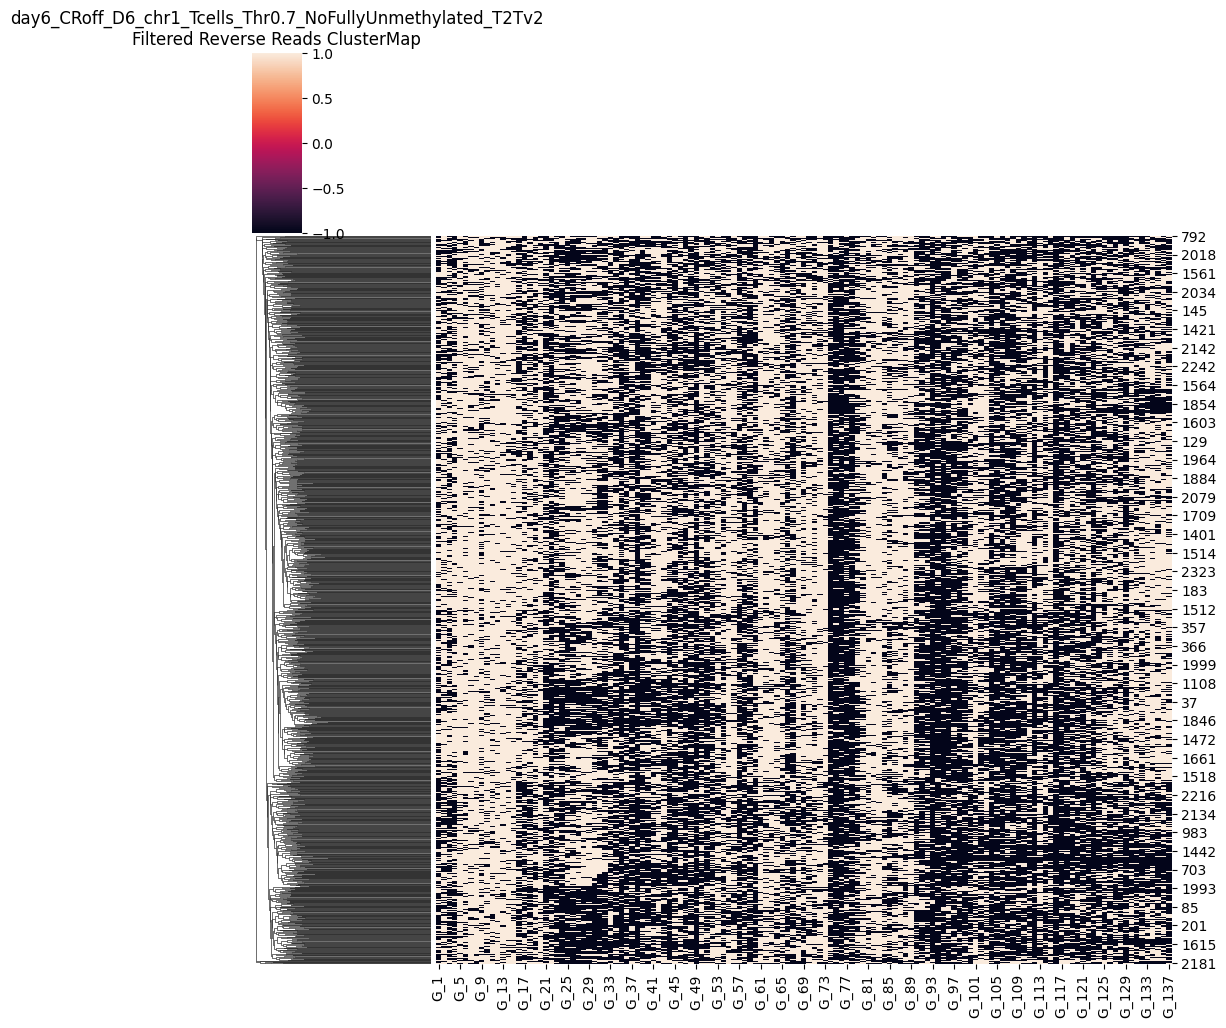

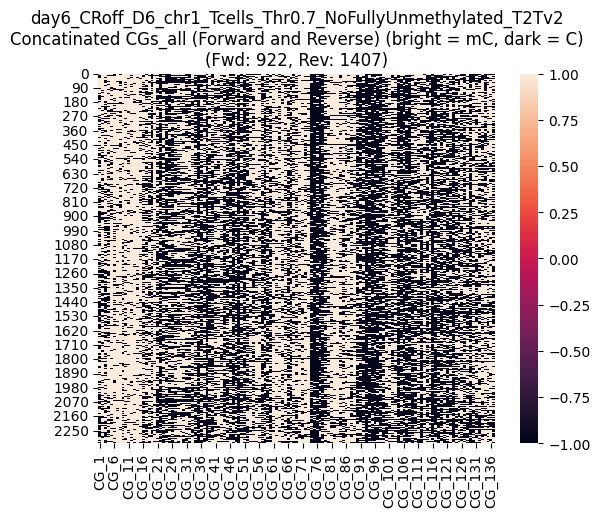

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



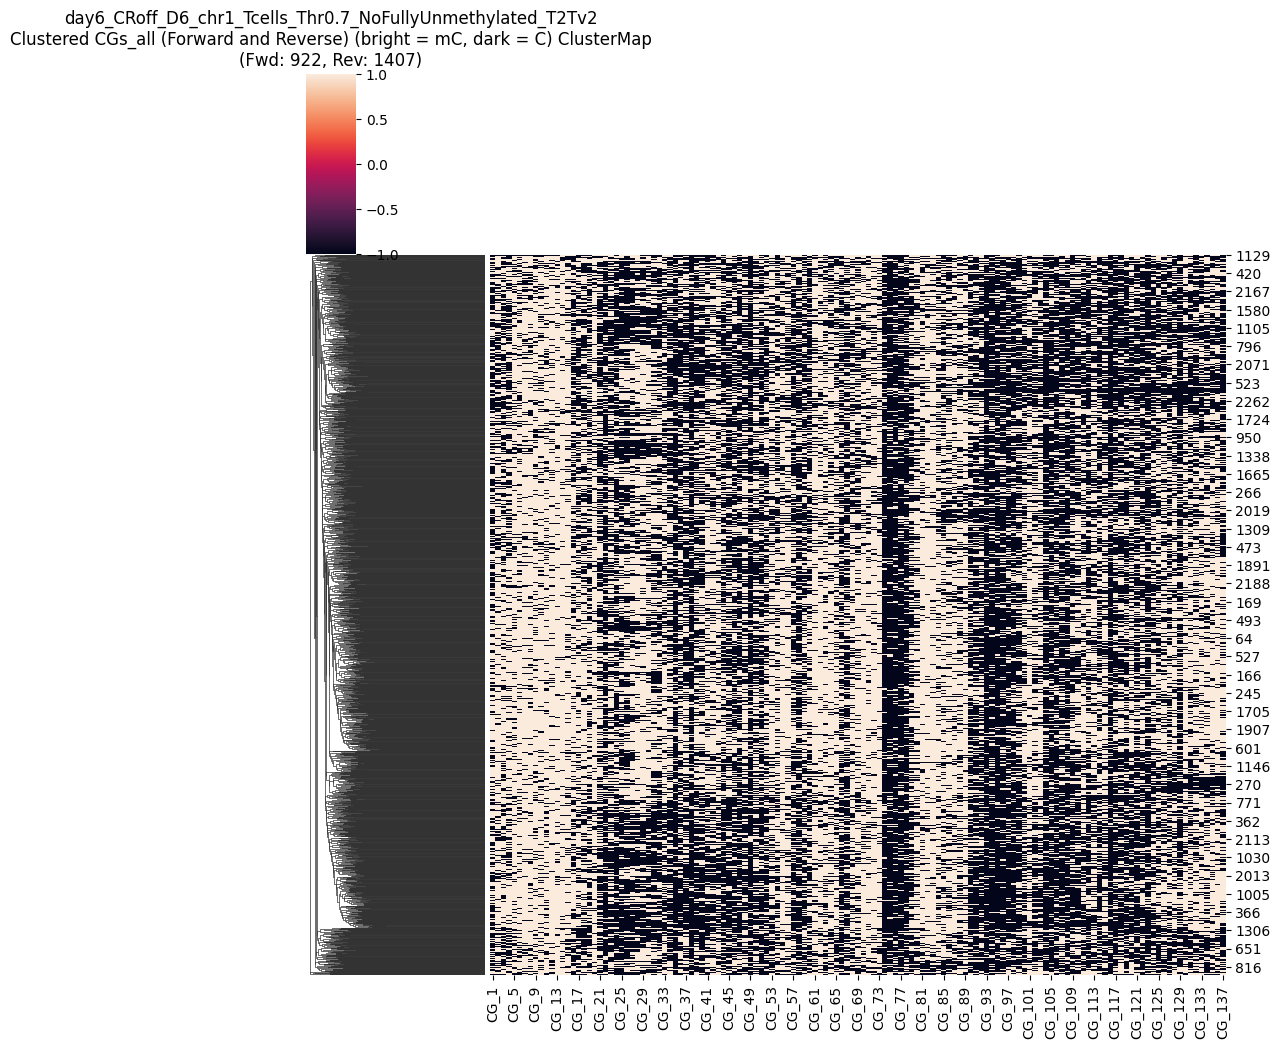

CGs_all saved as CG_137_removed_low80_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD922_numRVS1407.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (70% of max): 42.70
Original number of reads: 3439
Number of reads after filtering: 2514
Removed 925 reads


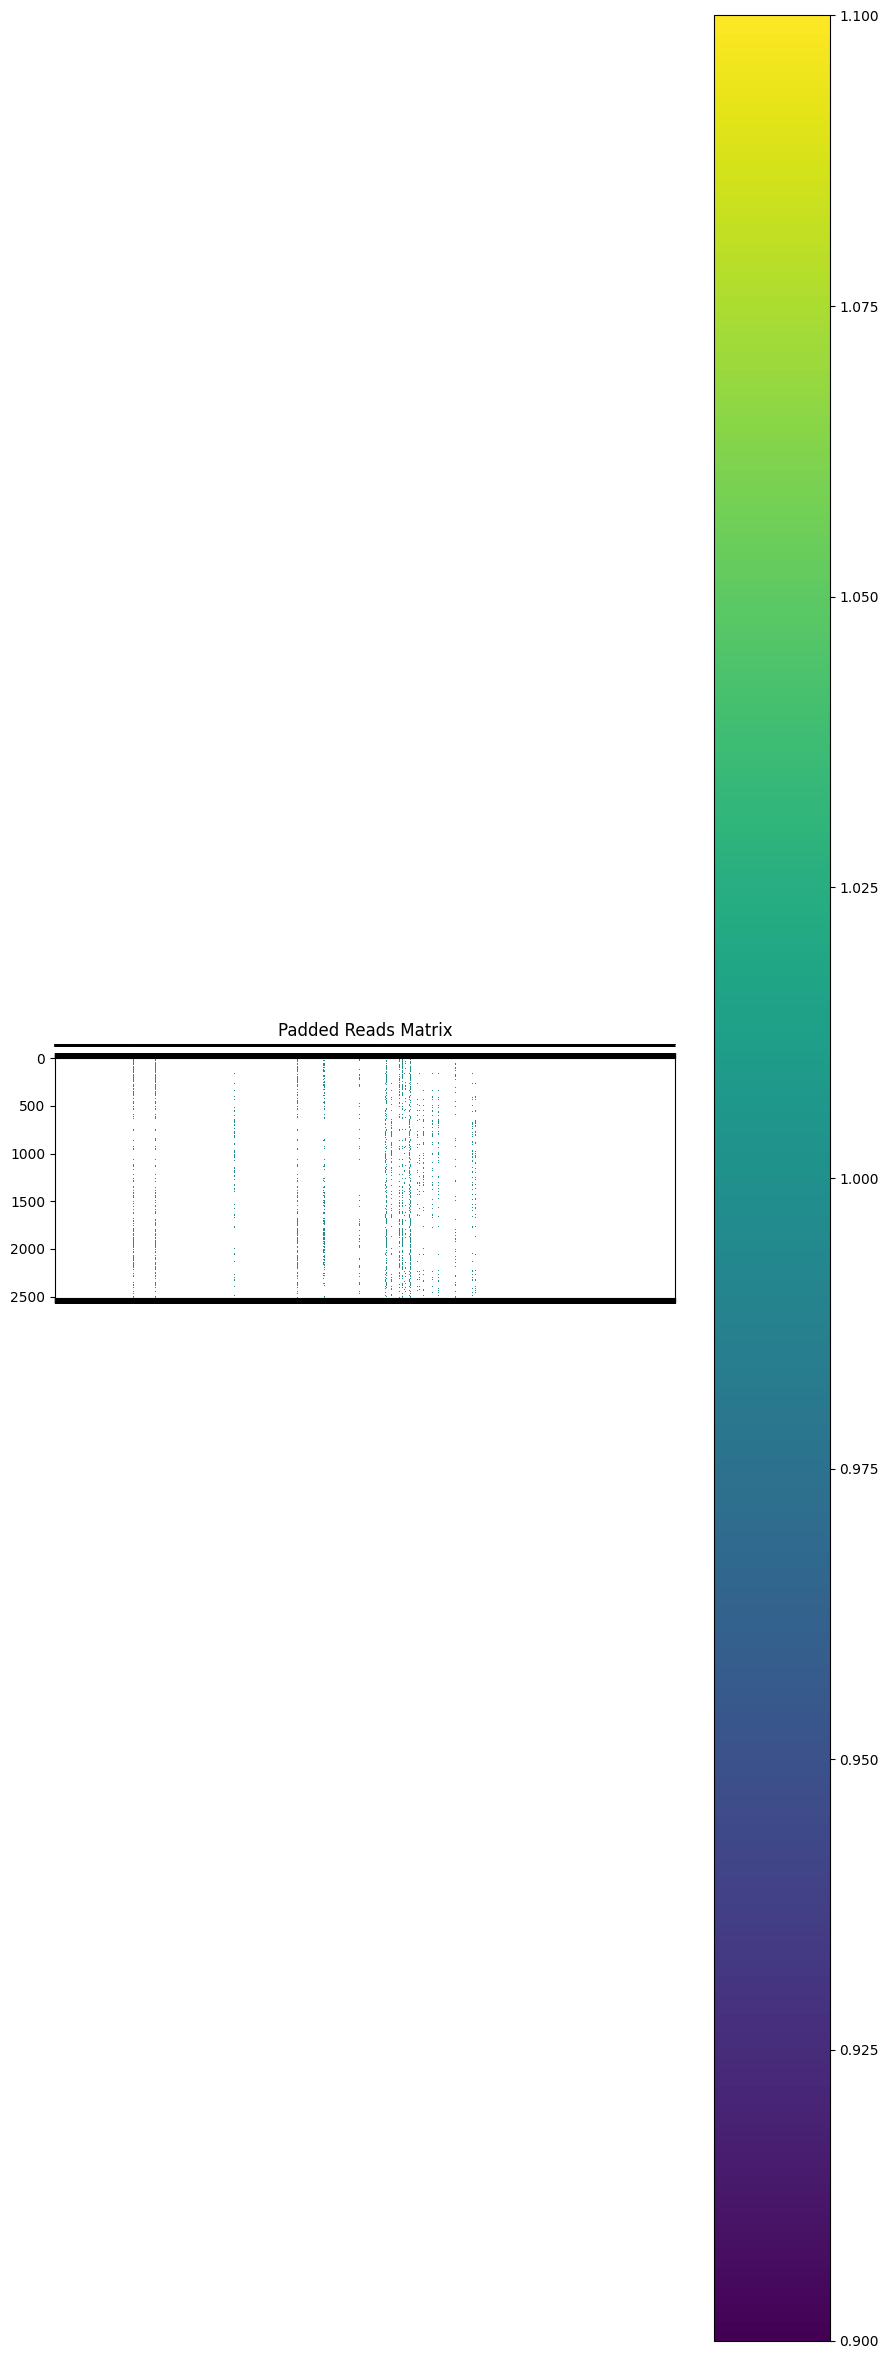

Padded reads saved to removed_low70_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


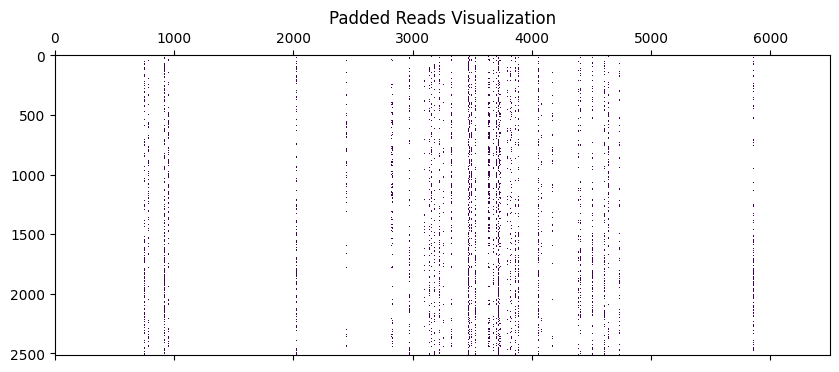

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

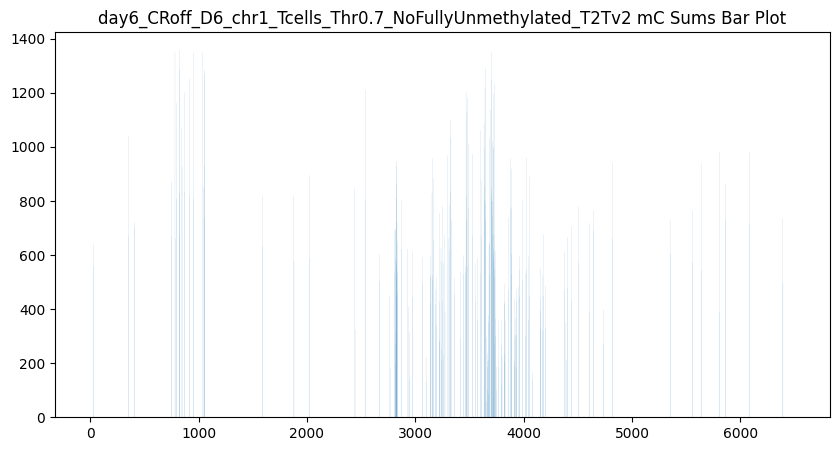

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


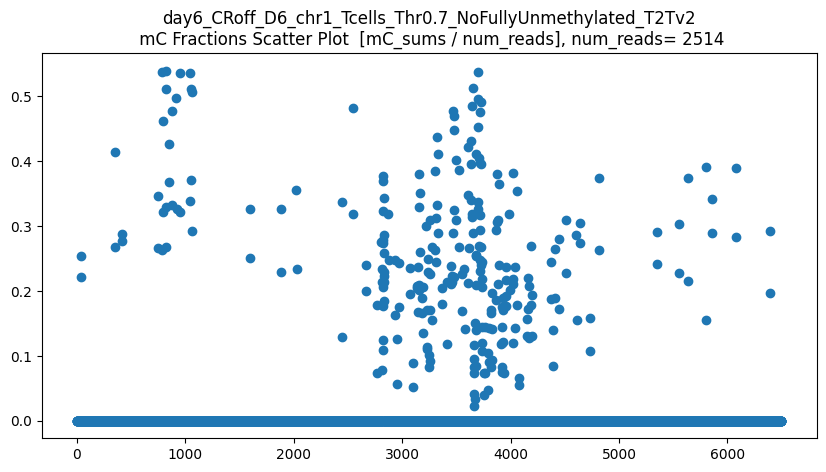

len(CGs_all) = 2514
CGs_all.shape = (2514, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


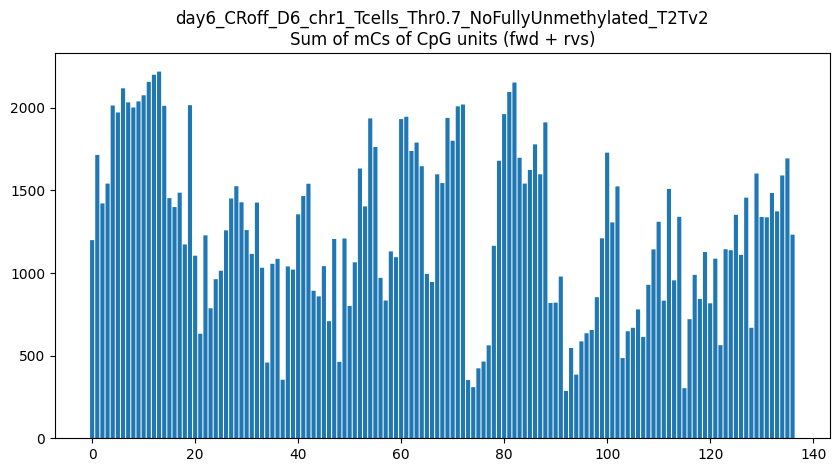

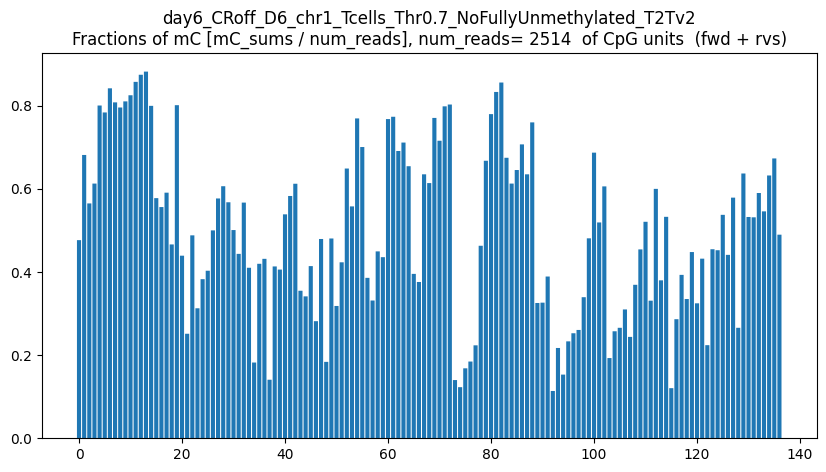

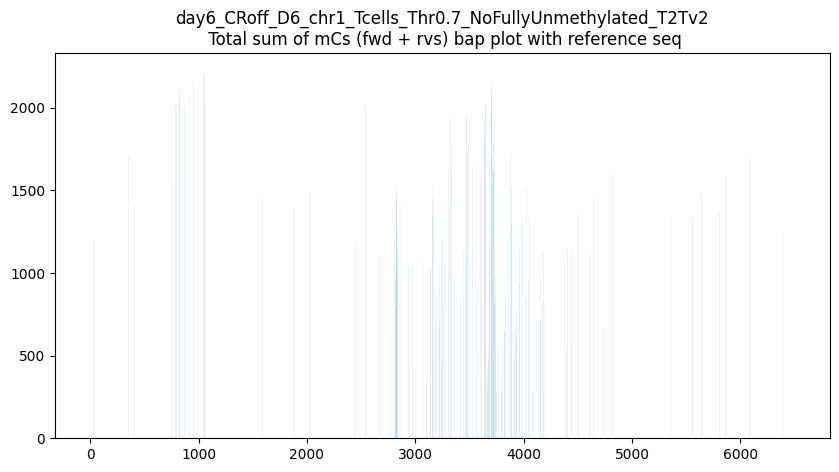

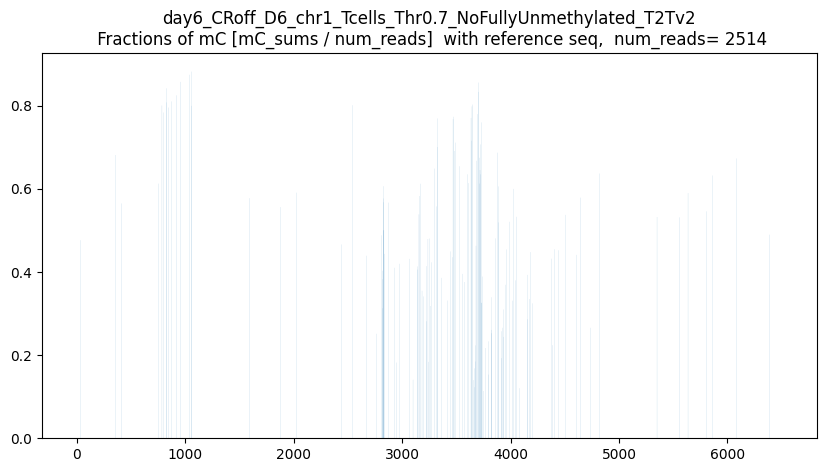

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



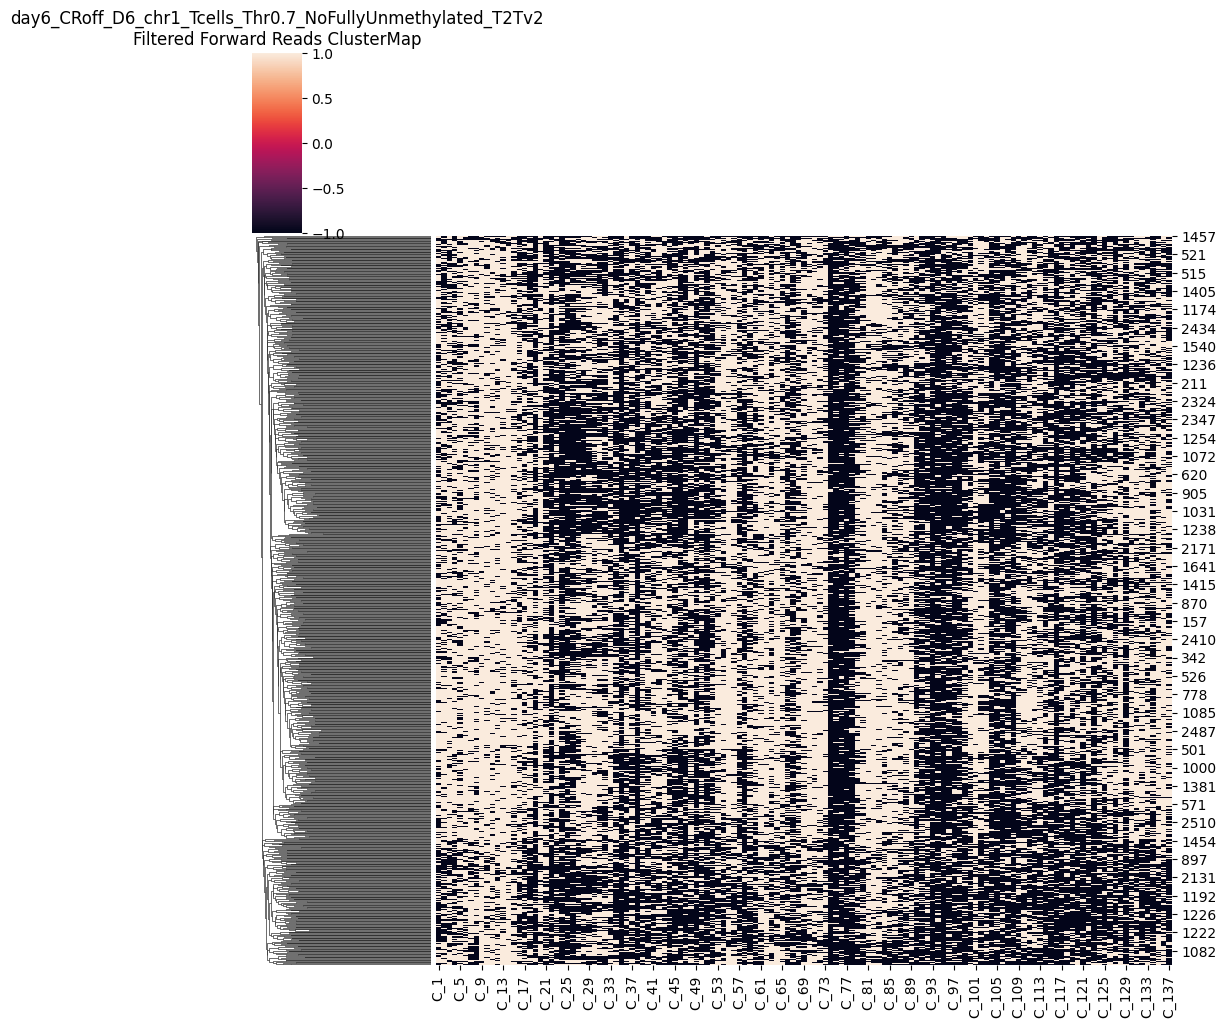

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



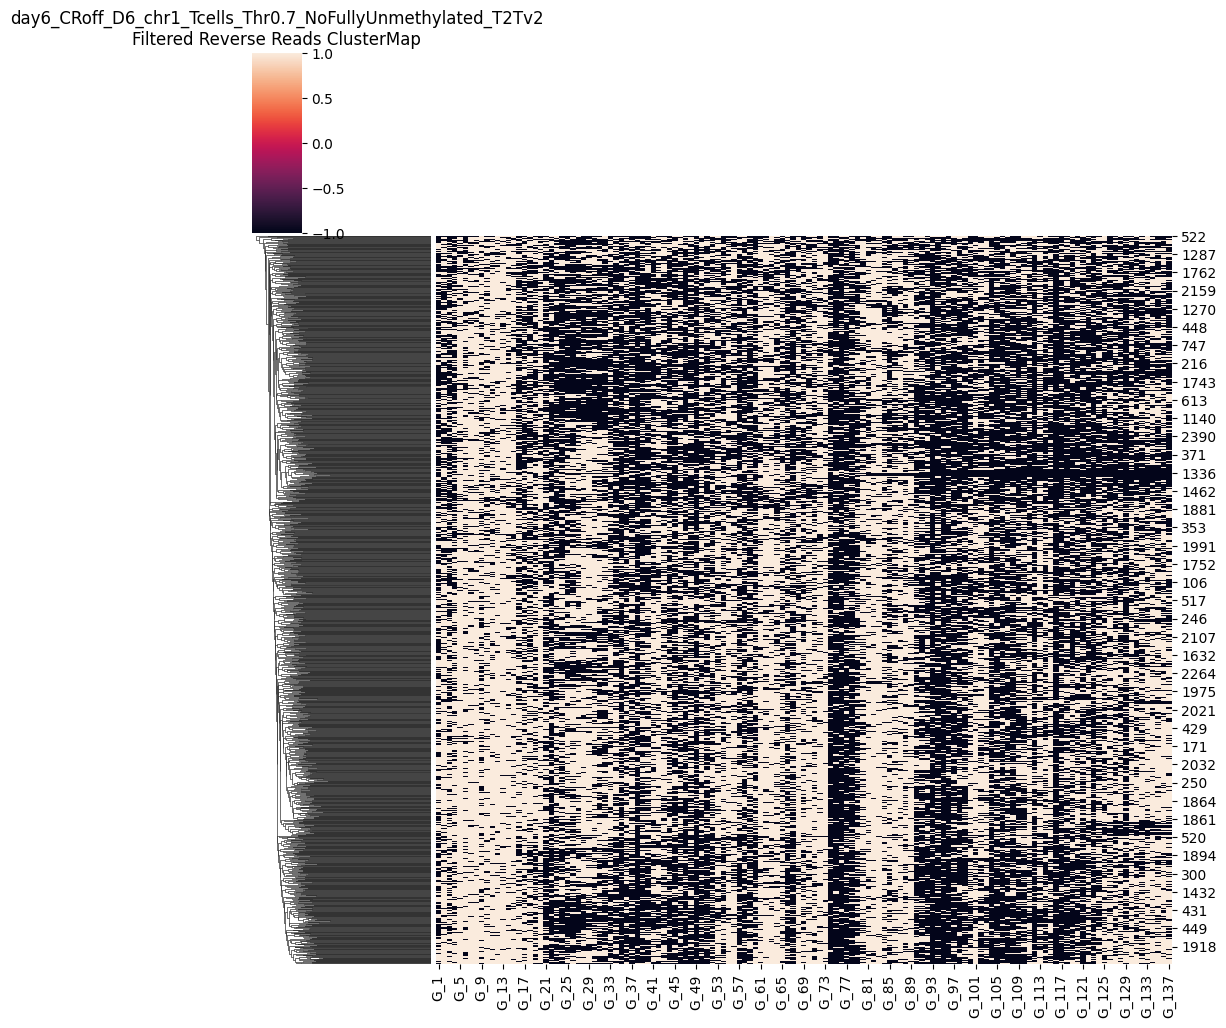

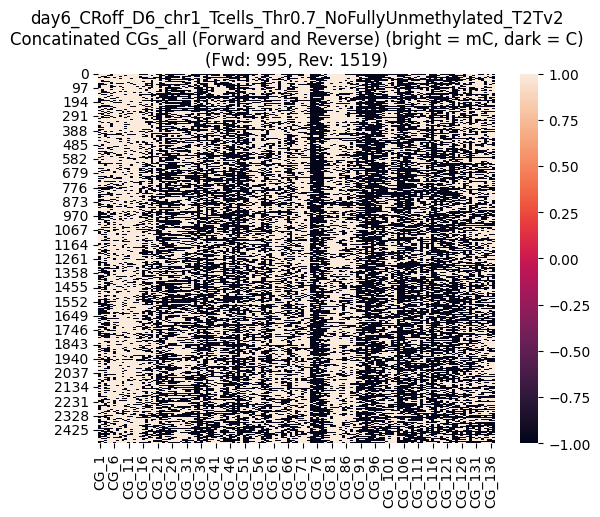

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



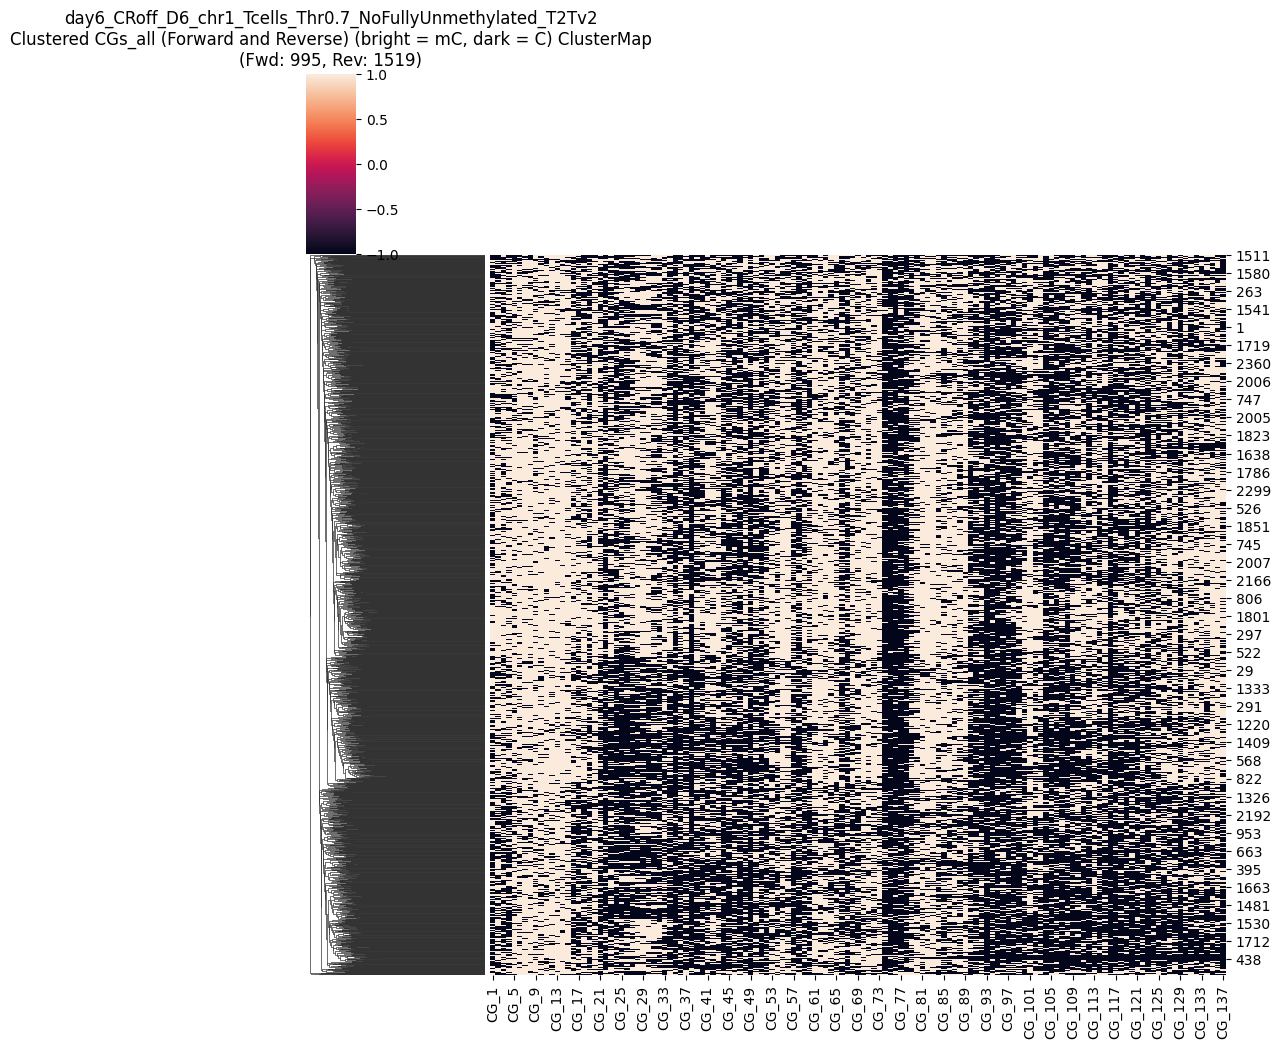

CGs_all saved as CG_137_removed_low70_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD995_numRVS1519.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (50% of max): 30.50
Original number of reads: 3439
Number of reads after filtering: 2839
Removed 600 reads


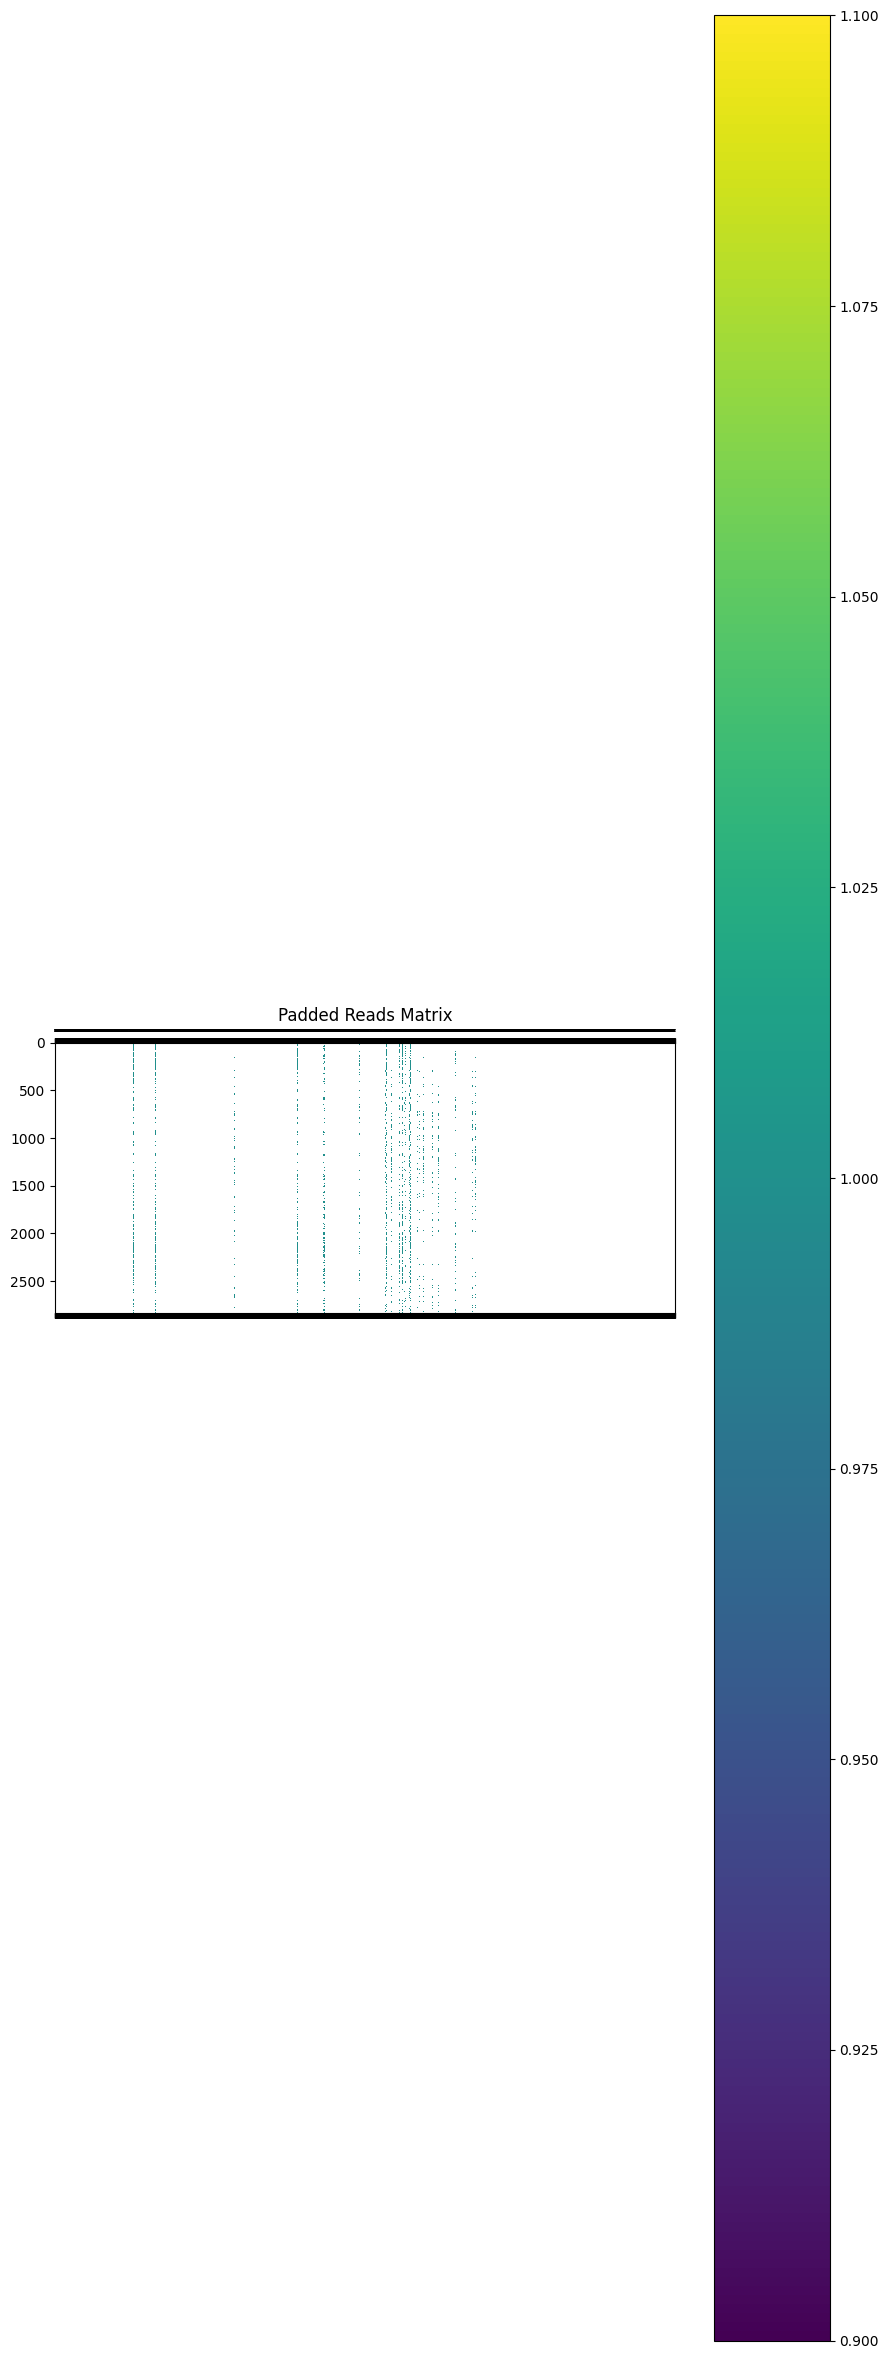

Padded reads saved to removed_low50_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


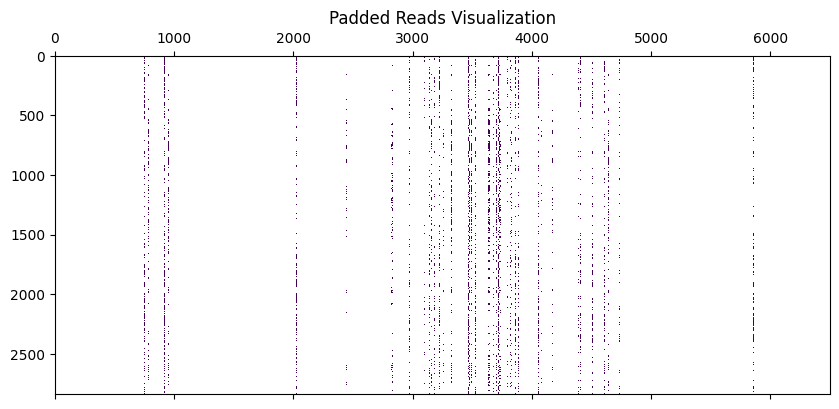

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

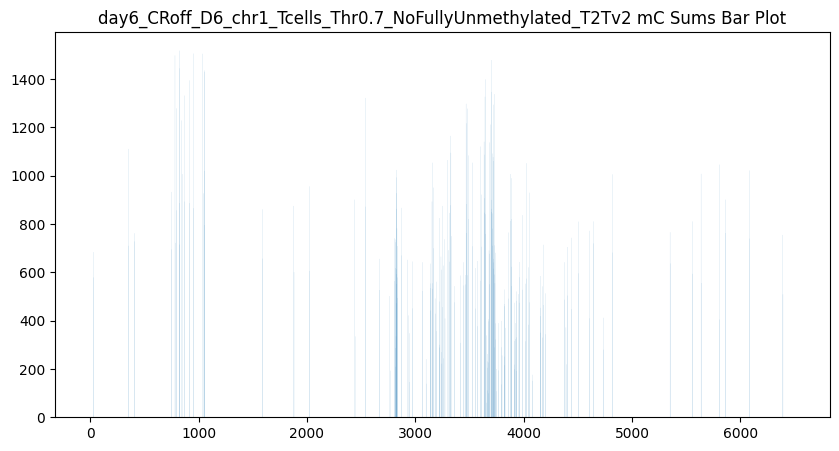

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


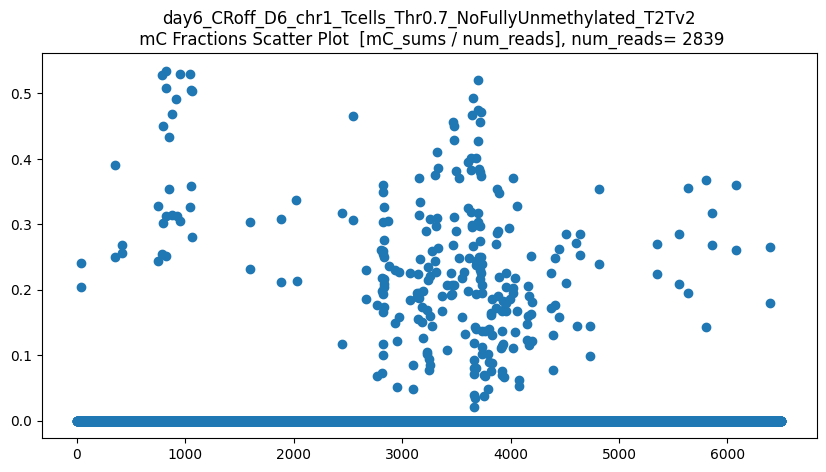

len(CGs_all) = 2839
CGs_all.shape = (2839, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


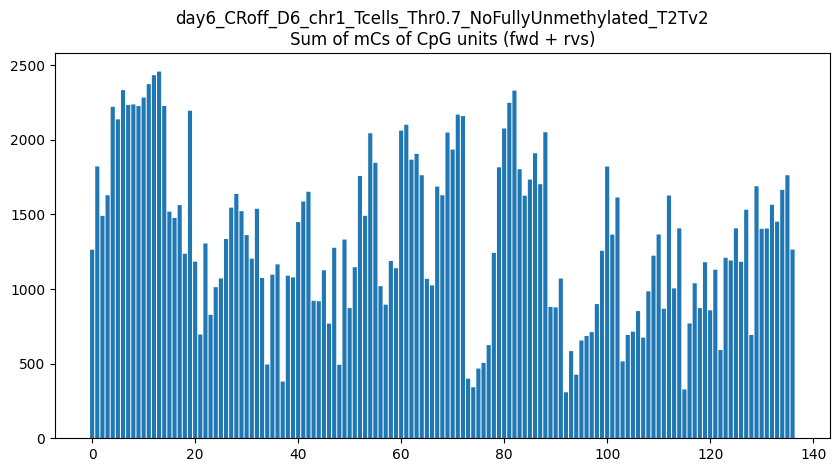

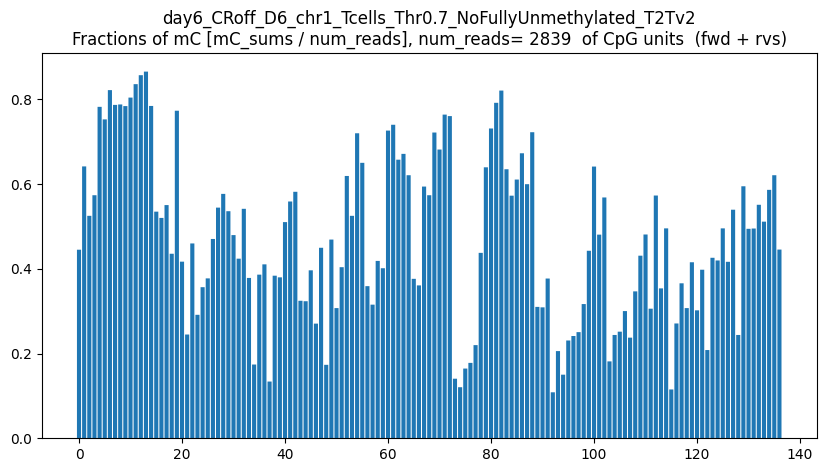

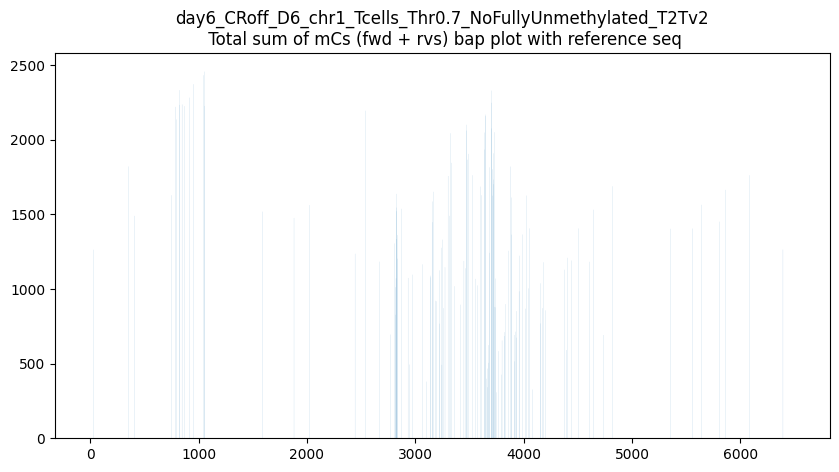

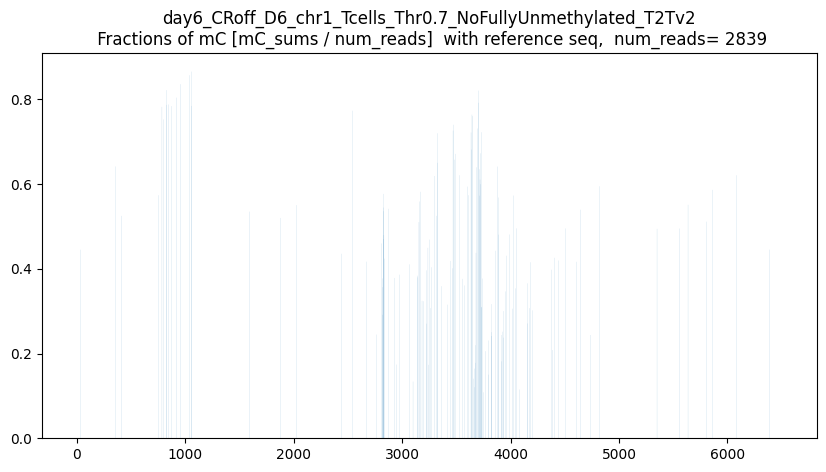

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



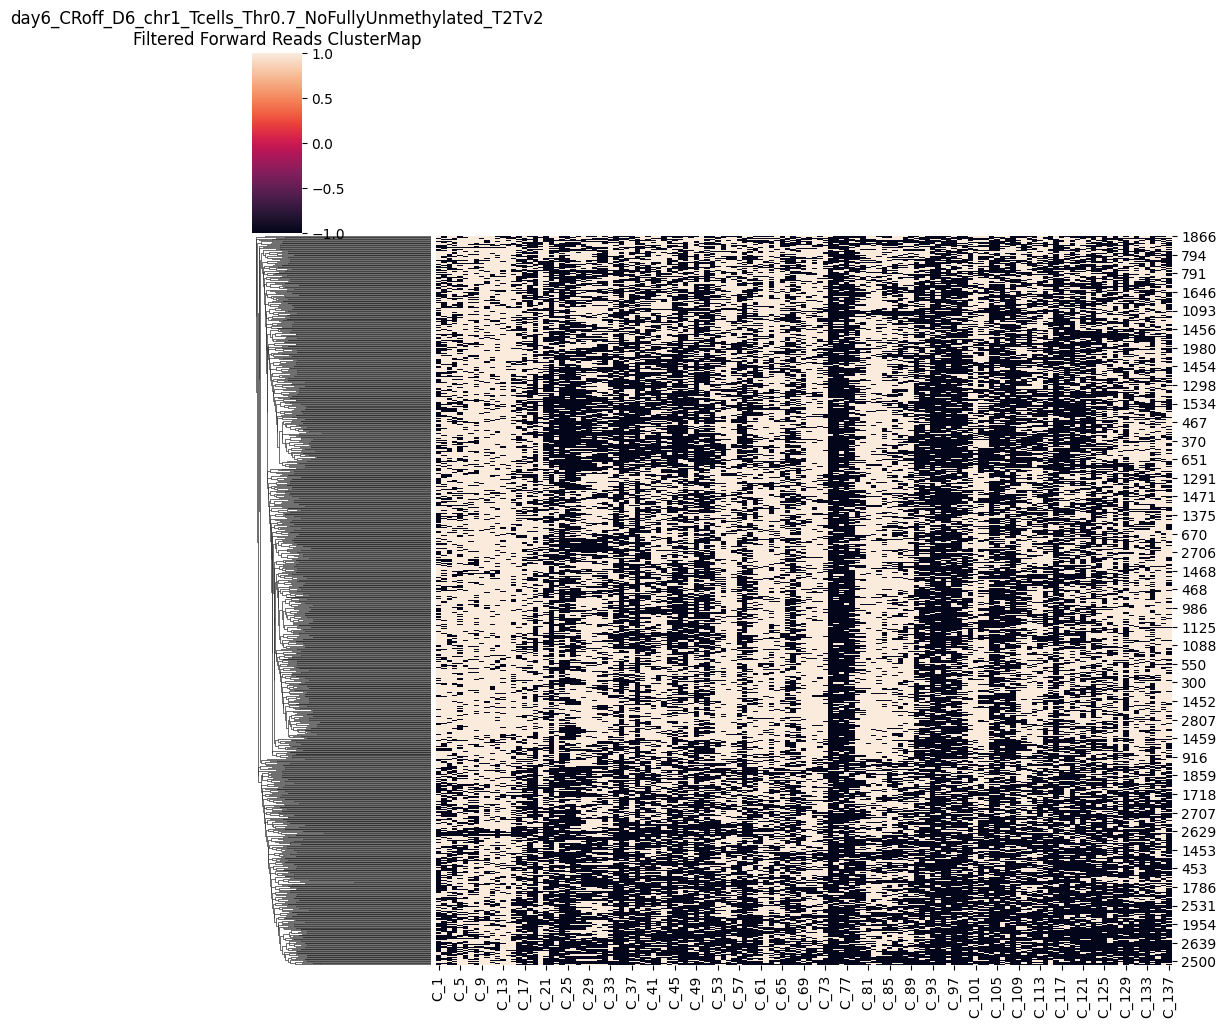

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



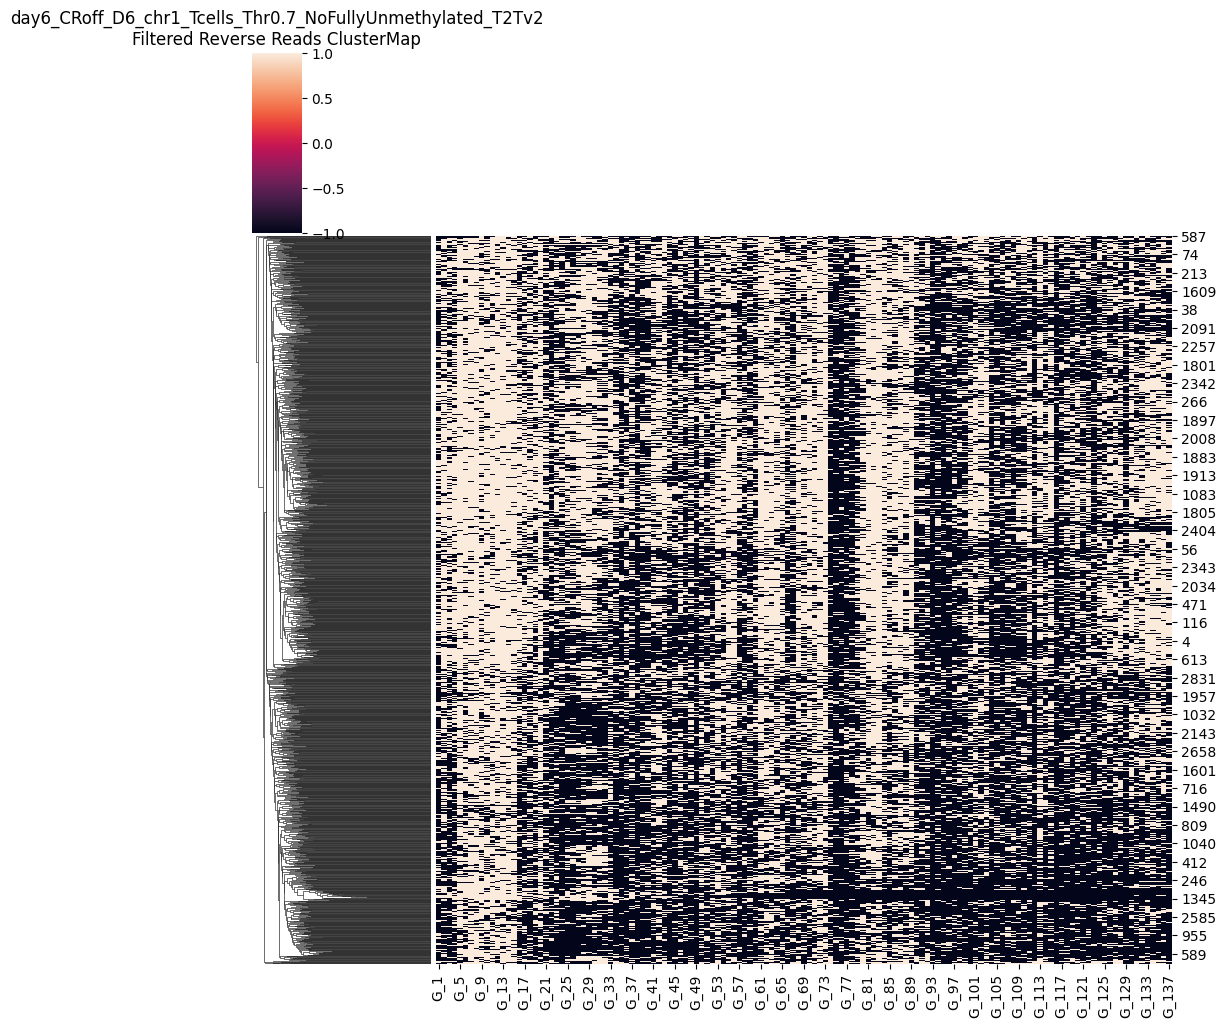

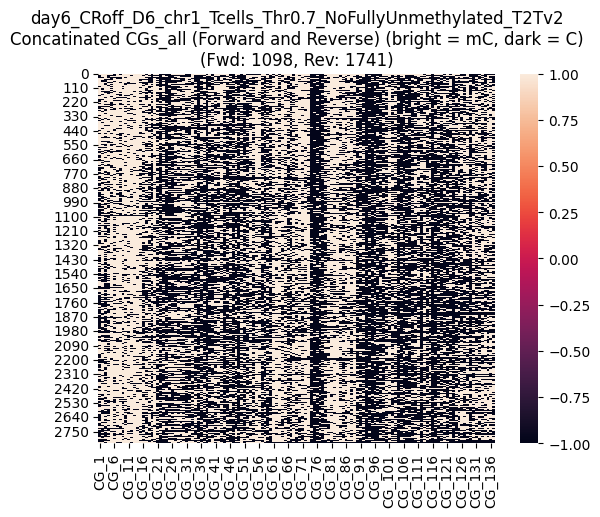

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



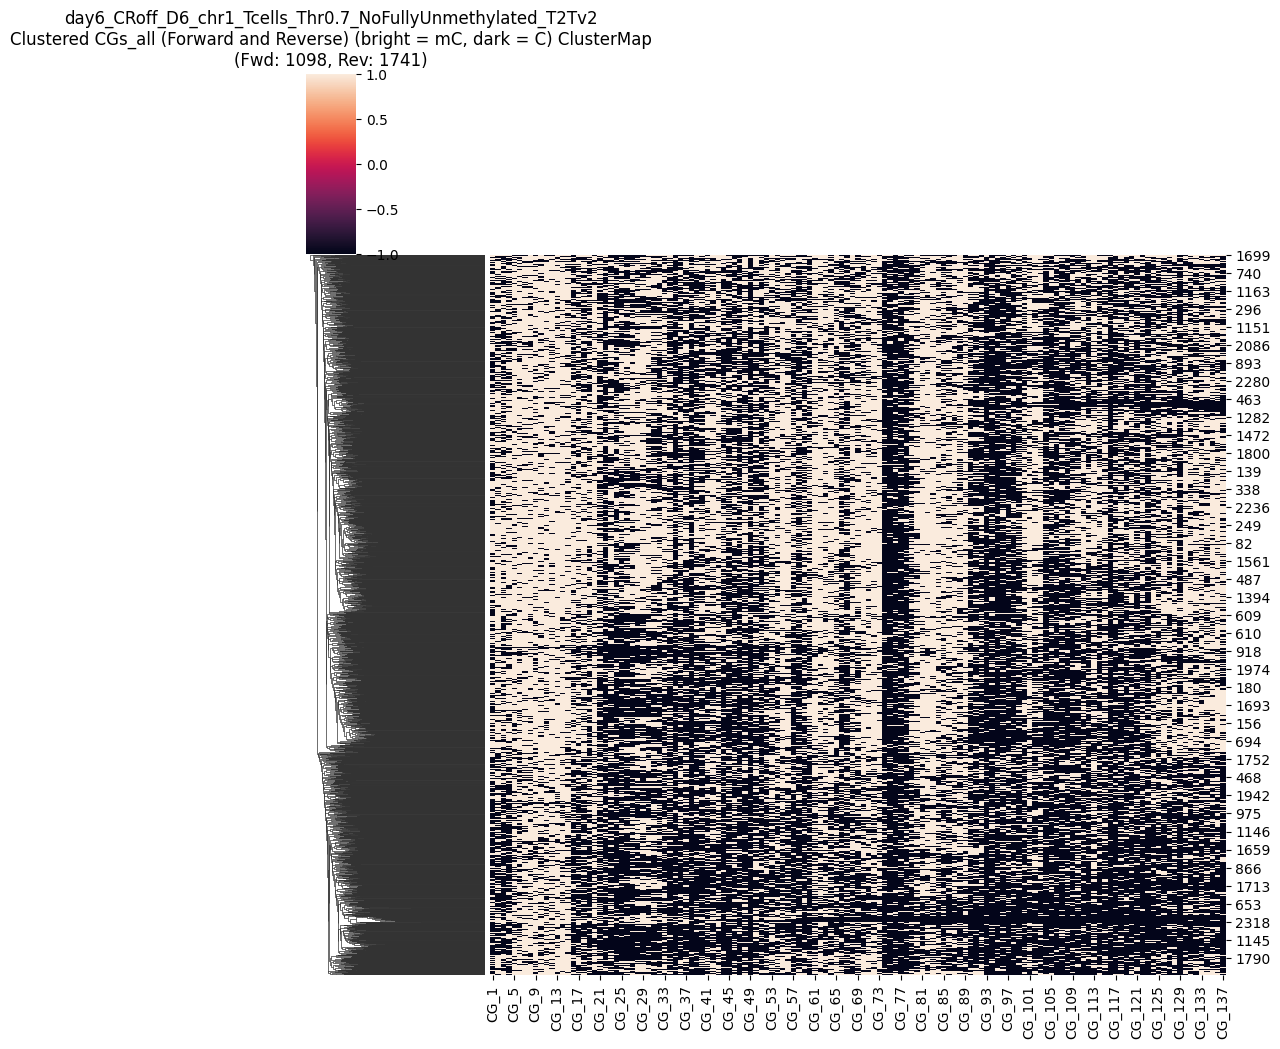

CGs_all saved as CG_137_removed_low50_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1098_numRVS1741.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (10% of max): 6.10
Original number of reads: 3439
Number of reads after filtering: 3357
Removed 82 reads


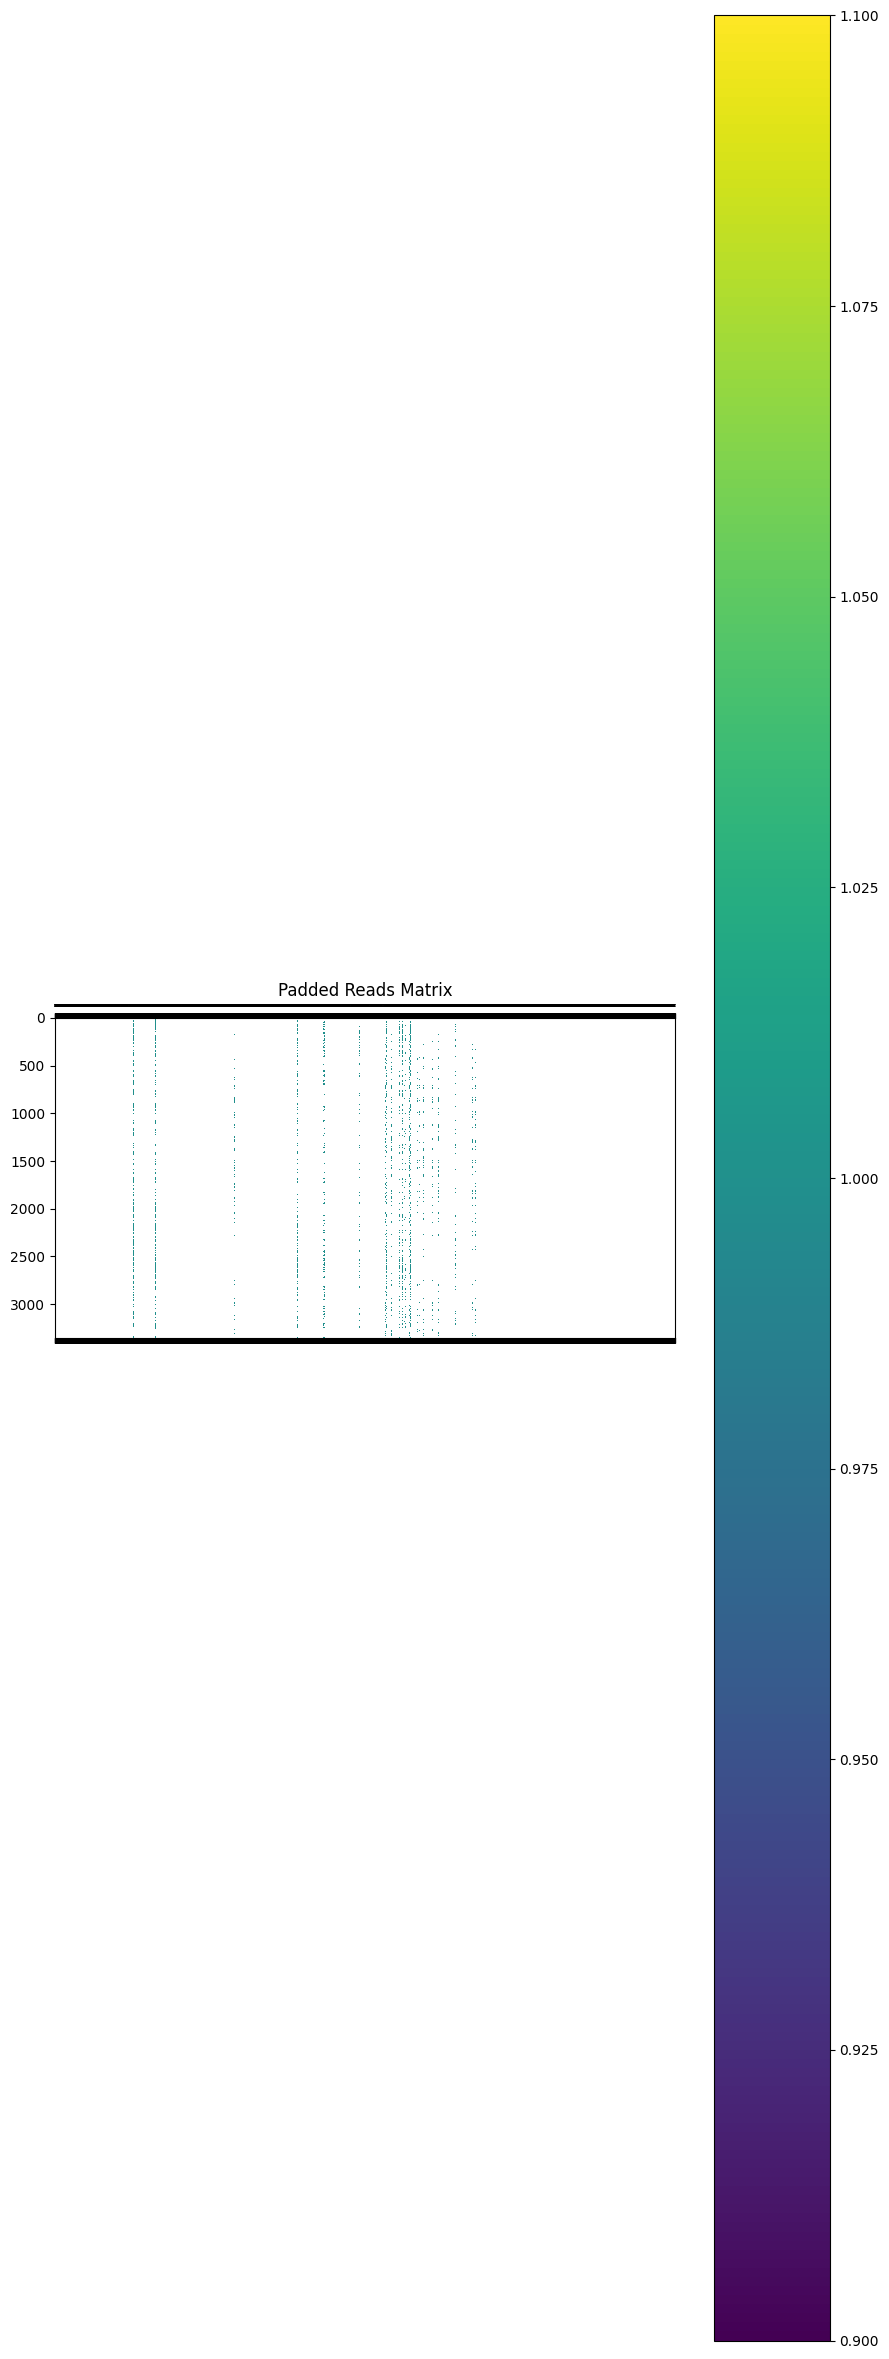

Padded reads saved to removed_low10_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04.npy
Padded reads loaded successfully.


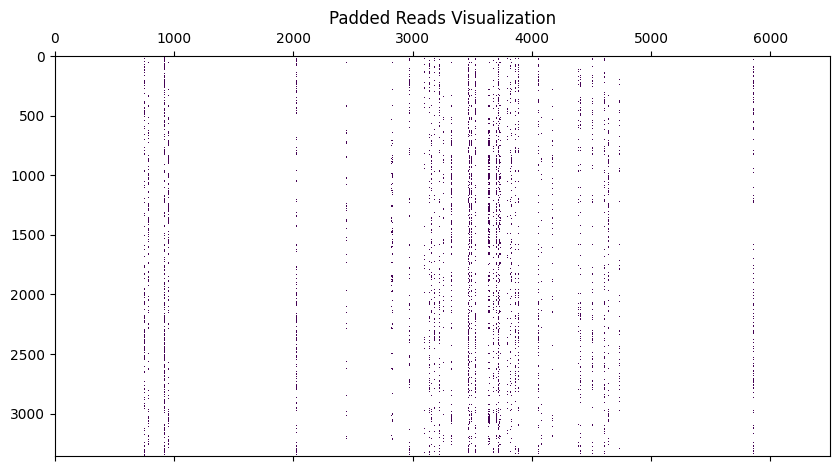

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

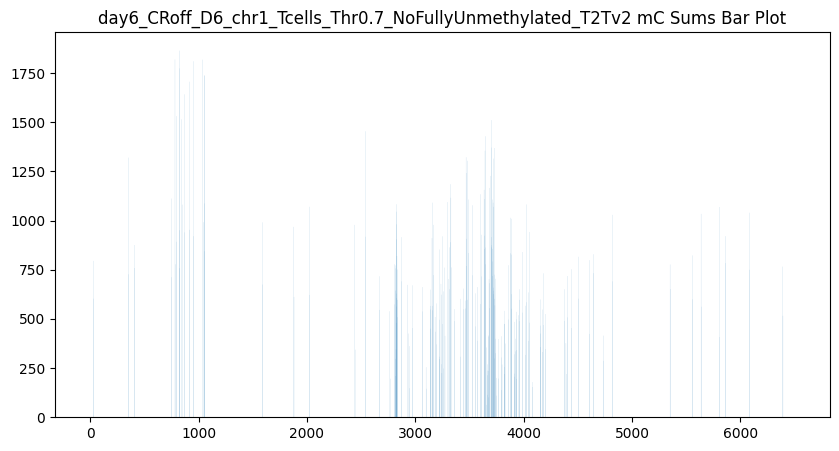

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


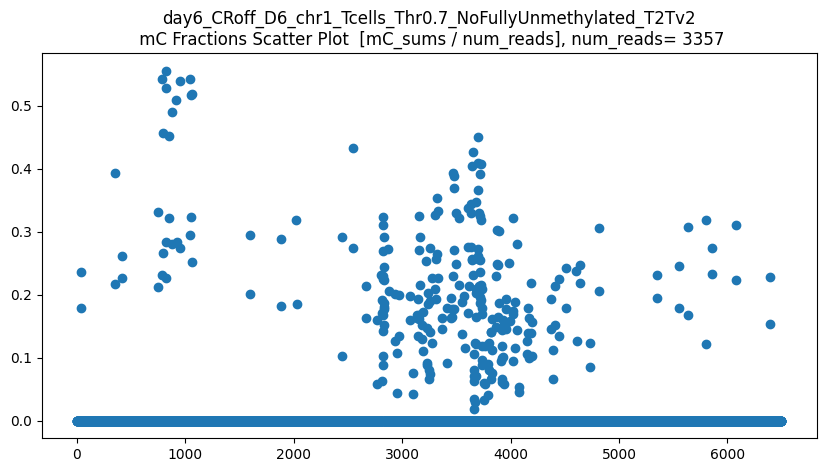

len(CGs_all) = 3357
CGs_all.shape = (3357, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


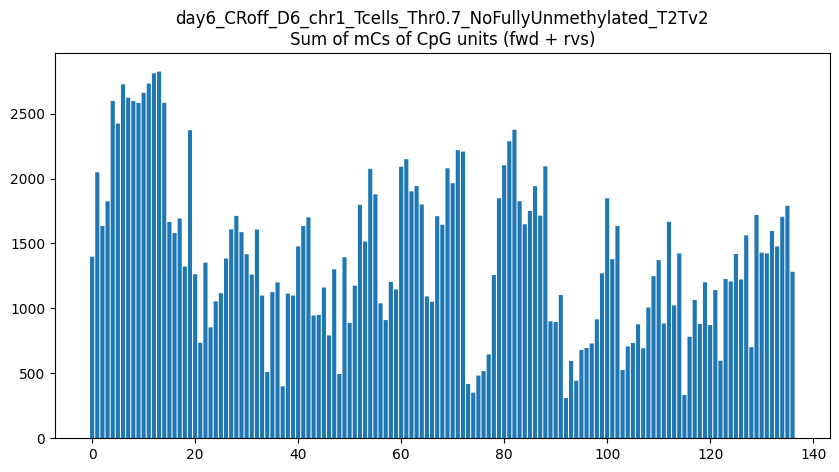

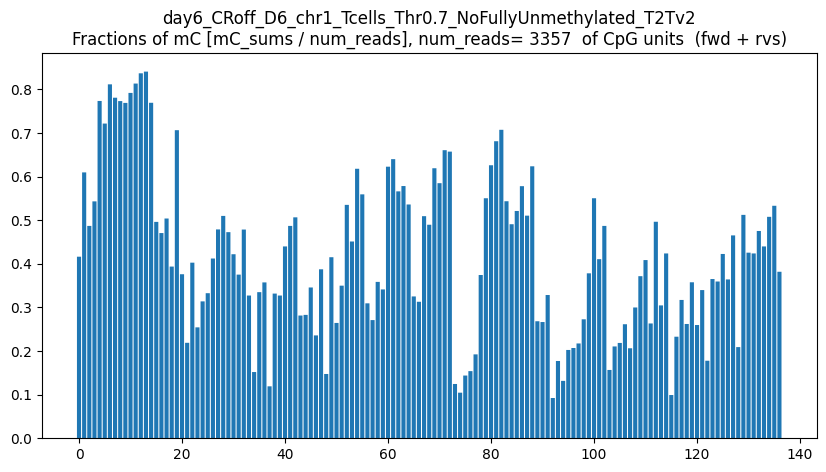

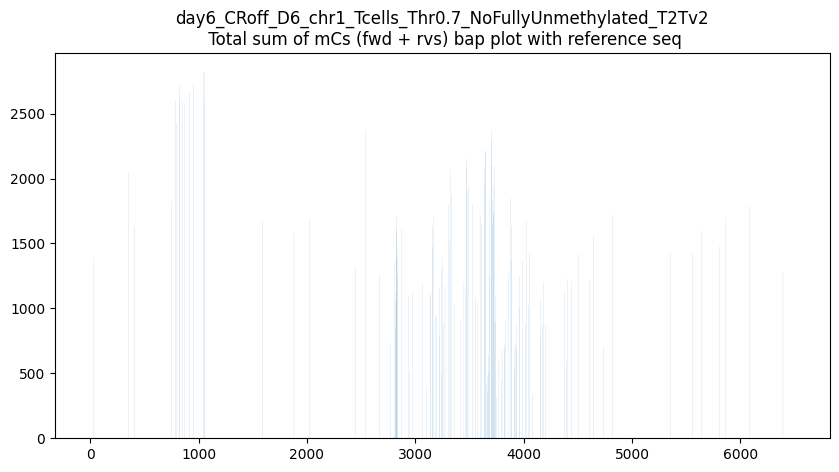

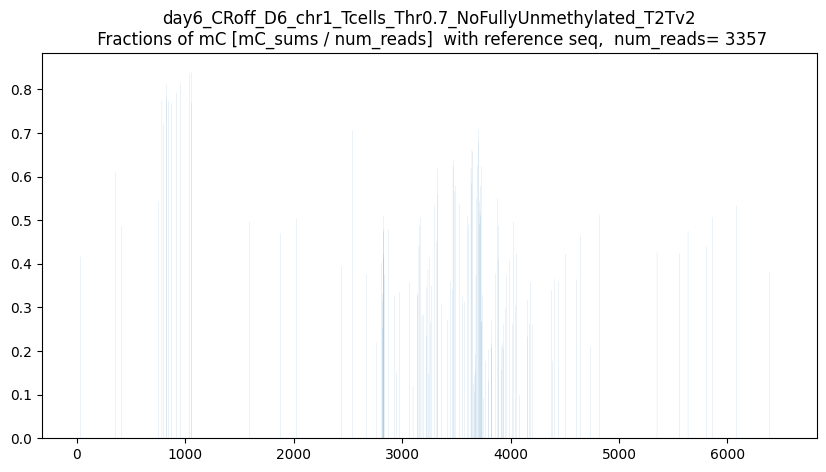

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



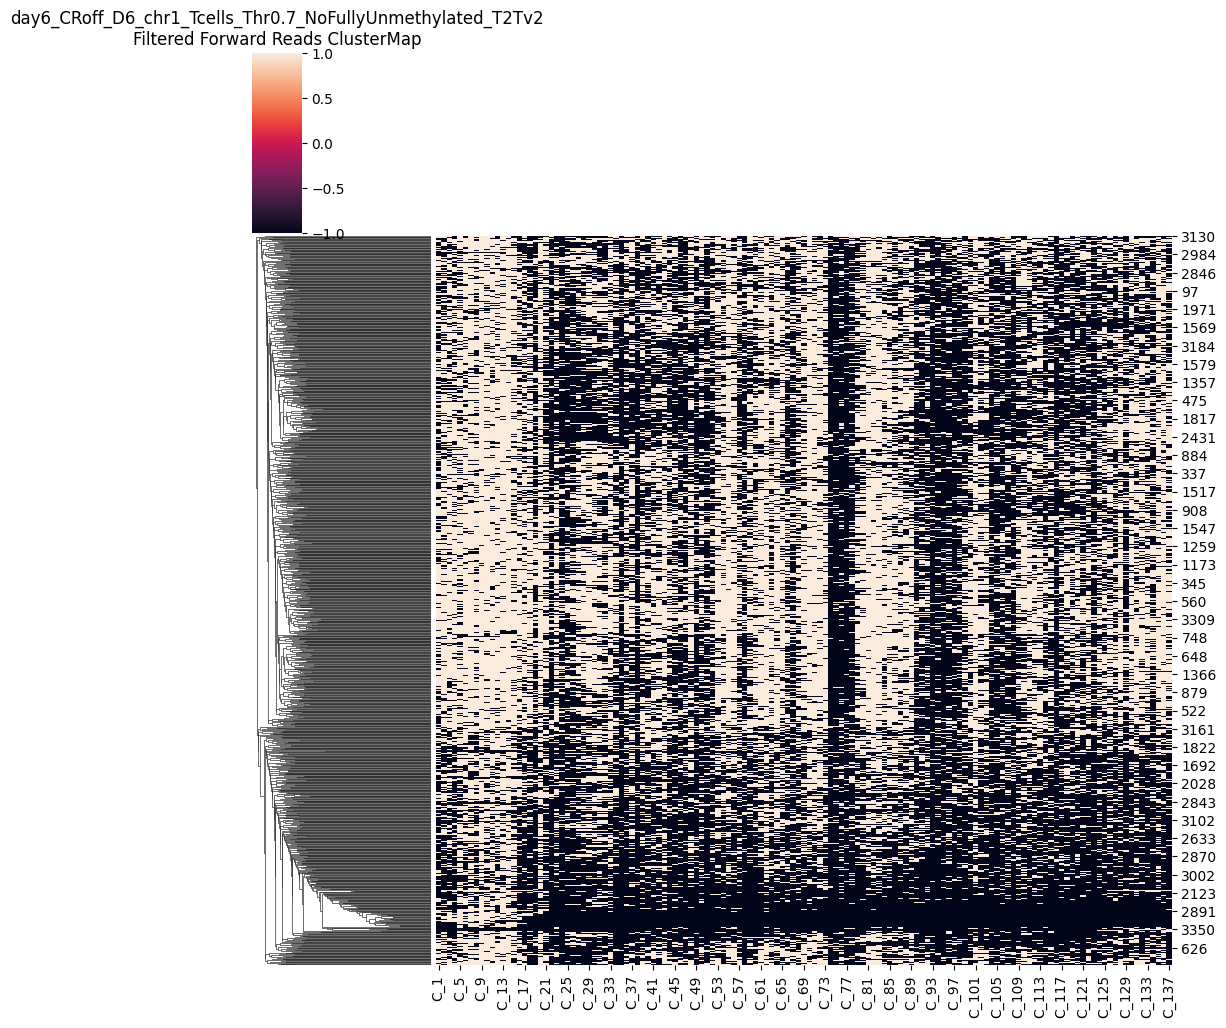

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



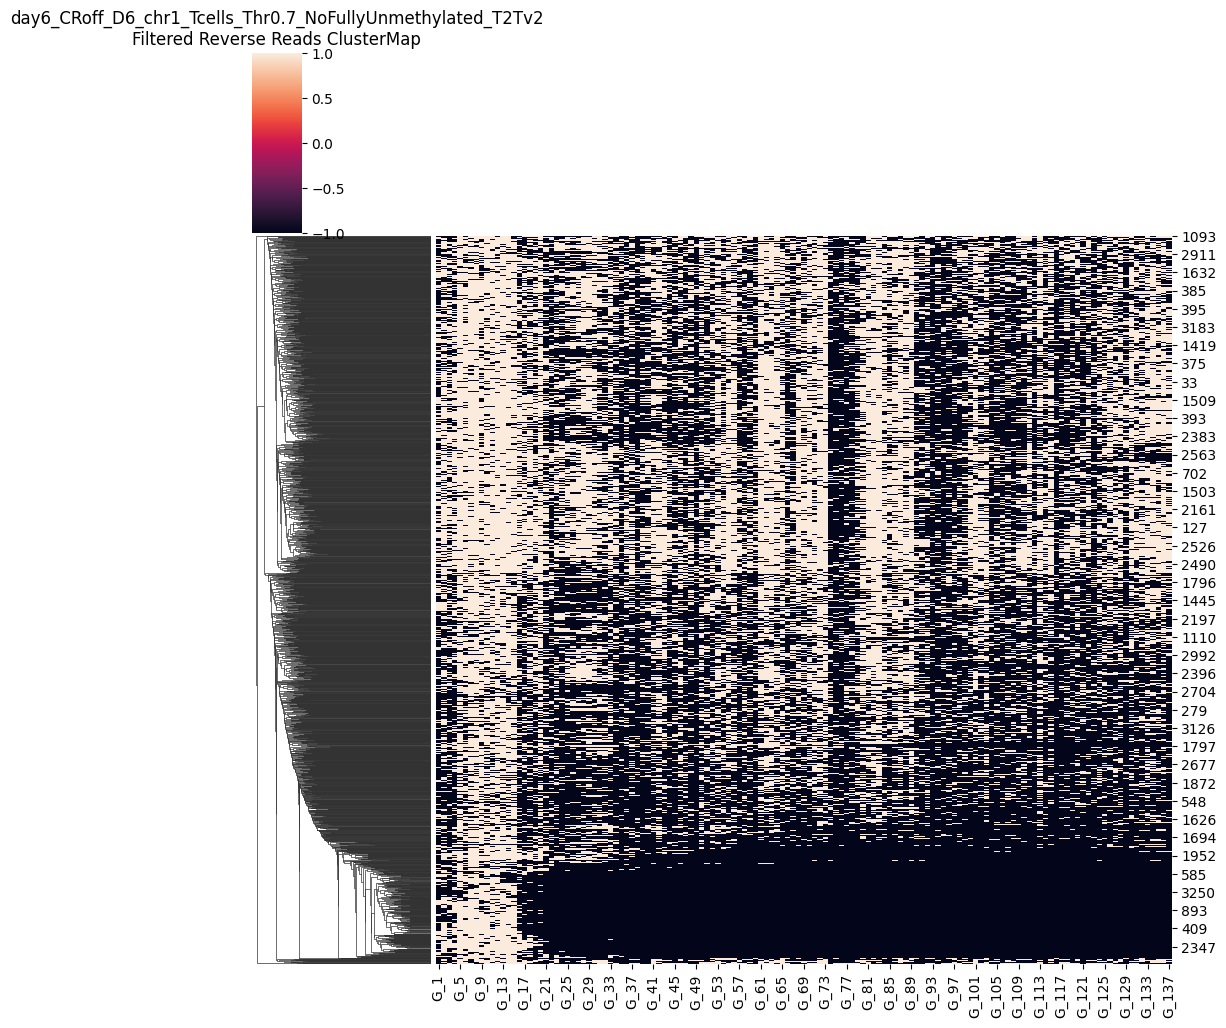

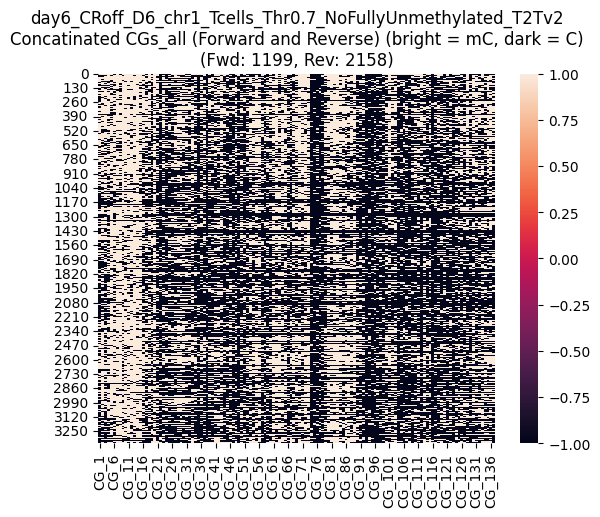

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



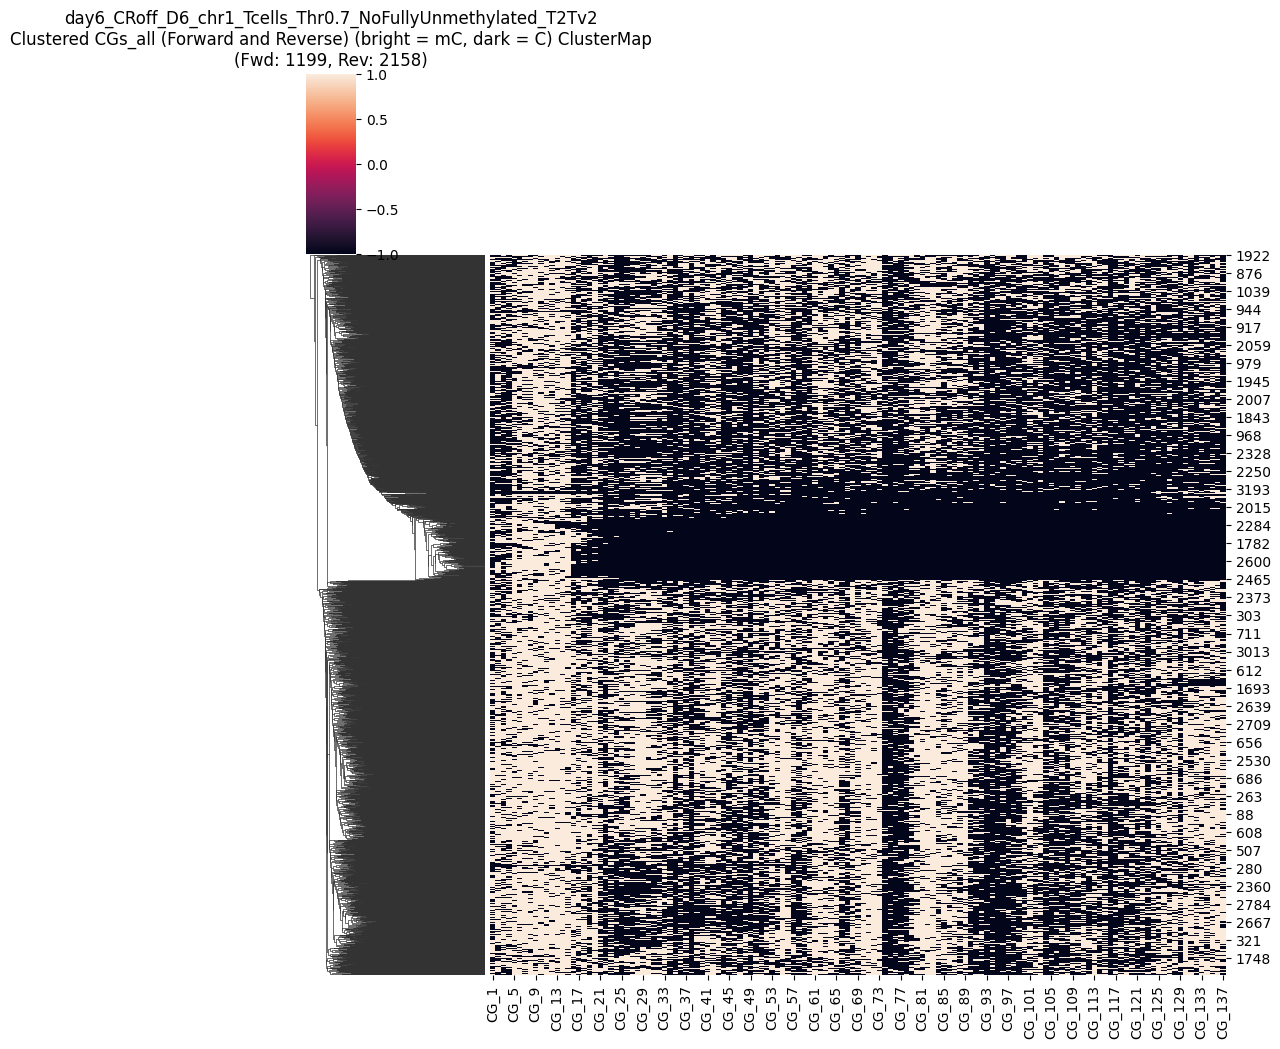

CGs_all saved as CG_137_removed_low10_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1199_numRVS2158.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1      NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0    NaN  ...   
2      1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN   1.0    NaN  ...   
3      NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
4      1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
3352   NaN   1.0   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...   
3353   1.0   1.0   NaN   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...   
3354   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0    NaN  ...   
3355   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...   
3356   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        1.0     NaN     1.0     NaN     NaN     NaN     NaN     1.0     NaN   
2        1.0     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
3        1.0     NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0   
4        1.0     NaN     1.0     1.0     NaN     NaN     NaN     NaN     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3352     1.0     1.0     1.0     1.0     NaN     NaN     1.0     1.0     1.0   
3353     1.0     NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0   
3354     1.0     1.0     1.0     1.0     1.0     1.0     NaN     NaN     NaN   
3355     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3356     NaN     NaN     1.0     NaN     NaN     1.0     1.0     NaN     1.0   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        1.0  
4        NaN  
...      ...  
3352     NaN  
3353     1.0  
3354     NaN  
3355     NaN  
3356     NaN  

[3357 rows x 137 columns]

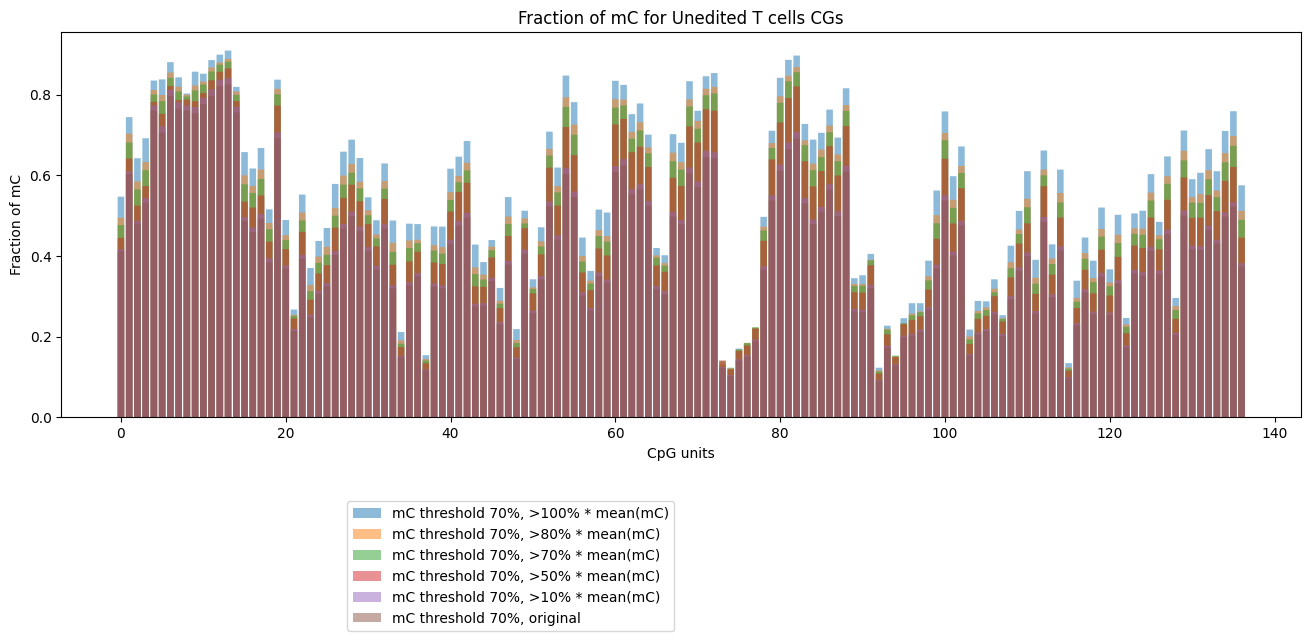

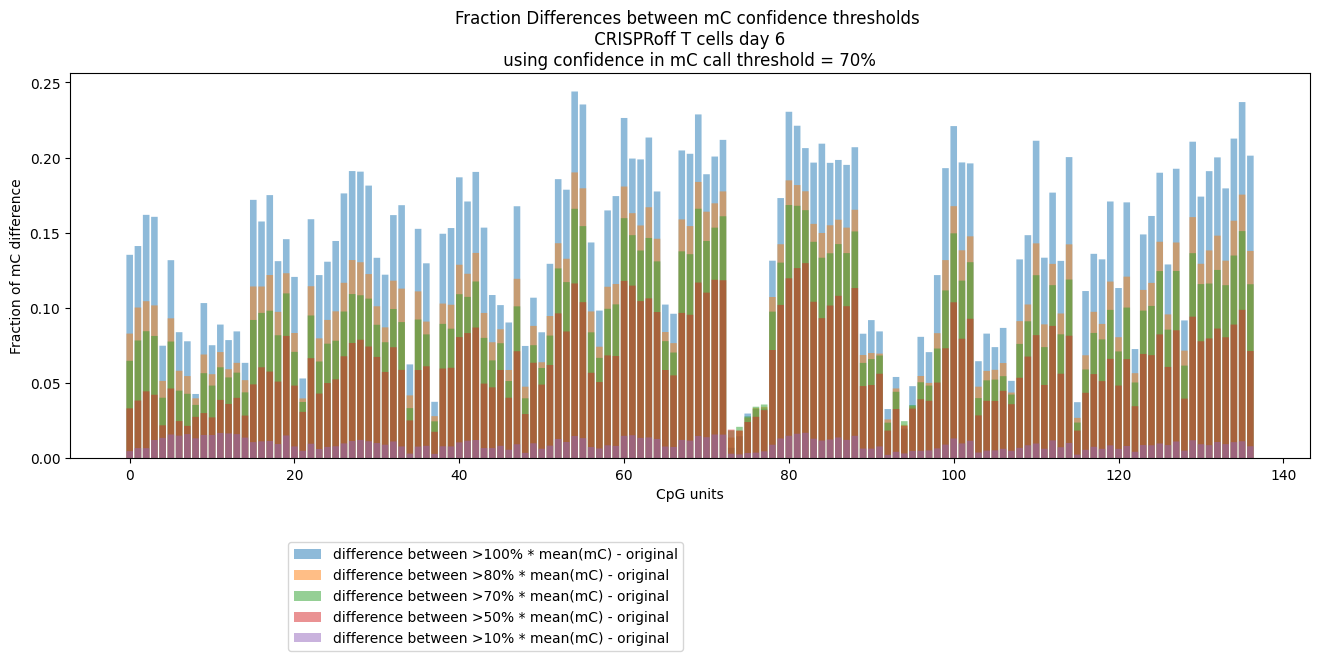

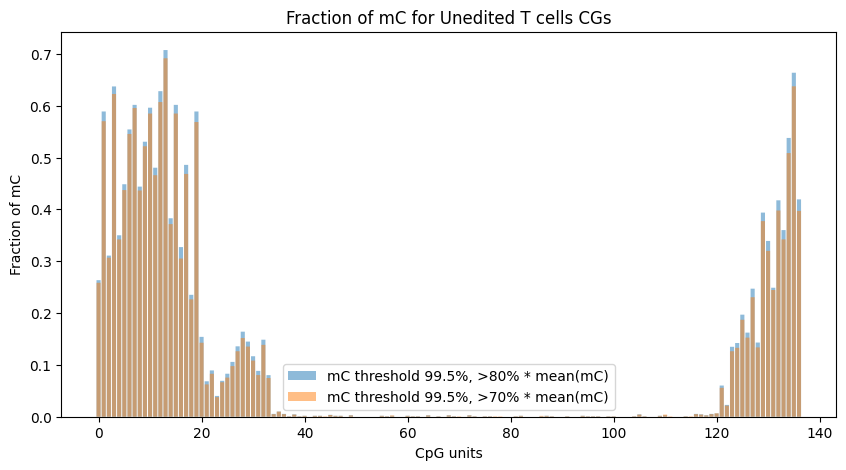

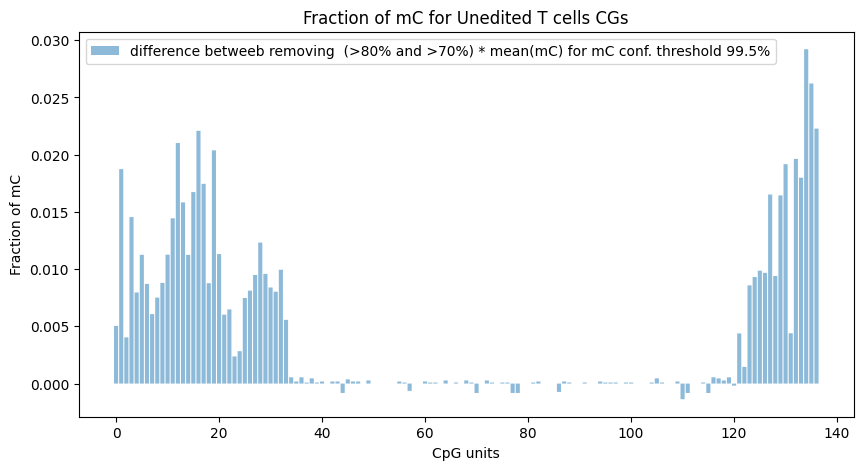